In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
from rdkit.Chem.Crippen import MolLogP, MolMR
from rdkit.Chem.Descriptors import ExactMolWt
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from math import dist
from tqdm.notebook import tqdm
import parmap
import warnings
warnings.filterwarnings("ignore")
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

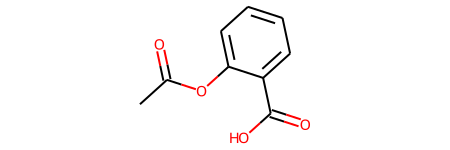

In [2]:
# Aspirin
Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O')

In [3]:
df1 = pd.read_csv('./PubChem_Similar_Aspirin.csv')
df1

cid                                           cmpdname  \
0         2244                                            Aspirin   
1         4133                                  Methyl salicylate   
2         5161                                          Salsalate   
3         6247                                    Aspirin calcium   
4         6876                 2-Hydroxyethyl 2-acetyloxybenzoate   
...        ...                                                ...   
1995  57131608  2,2'-(1,10-Dioxodecane-1,10-diylbisoxy)dibenzo...   
1996  57144682  [2-(2-Hydroxybenzoyl)oxycarbonylphenyl] 2-hydr...   
1997  57148452                   4-(2-Formylphenoxy)hexanoic acid   
1998  57150309      2-(14-Prop-2-enoyloxytetradecoxy)benzoic acid   
1999  57153887                             Octyl 2-octoxybenzoate   

                                            cmpdsynonym      mw          mf  \
0     aspirin|ACETYLSALICYLIC ACID|50-78-2|2-Acetoxy...  180.16      C9H8O4   
1     methyl salicylate|Methyl 2-hydroxybenzoate|119...  152.15      C8H8O3   
2     Salsalate|552-94-3|sasapyrine|Salicylsalicylic...  258.23    C14H10O5   
3     Aspirin calcium|Calcium aspirin|Ascal|69-46-5|...  398.40  C18H14CaO8   
4                                        SCHEMBL8383250  224.21    C11H12O5   
...                                                 ...     ...         ...   
1995  SCHEMBL973615|2,2'-(1,10-Dioxodecane-1,10-diyl...  442.50    C24H26O8   
1996                                                NaN  378.30    C21H14O7   
1997                                    SCHEMBL10745040  236.26    C13H16O4   
1998                                                NaN  404.50    C24H36O5   
1999                                     SCHEMBL4409053  362.50    C23H38O3   

      polararea  complexity  xlogp  heavycnt  hbonddonor  ...  \
0          63.6       212.0    1.2        13           1  ...   
1          46.5       144.0    2.3        11           1  ...   
2          83.8       341.0    3.0        19           2  ...   
3         133.0       206.0    NaN        27           0  ...   
4          72.8       251.0    0.5        16           1  ...   
...         ...         ...    ...       ...         ...  ...   
1995      127.0       578.0    4.9        32           2  ...   
1996      110.0       575.0    5.0        28           2  ...   
1997       63.6       252.0    2.2        17           1  ...   
1998       72.8       449.0    7.7        29           1  ...   
1999       35.5       329.0    8.6        26           0  ...   

                         inchikey  \
0     BSYNRYMUTXBXSQ-UHFFFAOYSA-N   
1     OSWPMRLSEDHDFF-UHFFFAOYSA-N   
2     WVYADZUPLLSGPU-UHFFFAOYSA-N   
3     KRALOLGXHLZTCW-UHFFFAOYSA-L   
4     NKAIIFWPOWVGOC-UHFFFAOYSA-N   
...                           ...   
1995  XVGPREYMODJRKV-UHFFFAOYSA-N   
1996  PACJSISIZIMYDU-UHFFFAOYSA-N   
1997  PFKWEDYXOSQVTG-UHFFFAOYSA-N   
1998  GIYKOSWGVAQNPZ-UHFFFAOYSA-N   
1999  DZMKNEPEKLQFRK-UHFFFAOYSA-N   

                                              iupacname meshheadings  \
0                               2-acetyloxybenzoic acid      Aspirin   
1                              methyl 2-hydroxybenzoate          NaN   
2                   2-(2-hydroxybenzoyl)oxybenzoic acid          NaN   
3                           calcium;2-acetyloxybenzoate      Aspirin   
4                    2-hydroxyethyl 2-acetyloxybenzoate          NaN   
...                                                 ...          ...   
1995  2-[10-(2-carboxyphenoxy)-10-oxodecanoyl]oxyben...          NaN   
1996  [2-(2-hydroxybenzoyl)oxycarbonylphenyl] 2-hydr...          NaN   
1997                   4-(2-formylphenoxy)hexanoic acid          NaN   
1998      2-(14-prop-2-enoyloxytetradecoxy)benzoic acid          NaN   
1999                             octyl 2-octoxybenzoate          NaN   

                                              annothits annothitcnt  \
0     Biological Test Results|Biomolecular Interacti...          13   


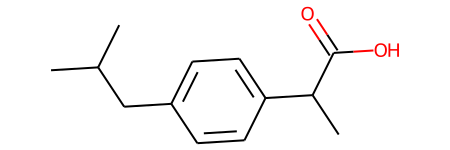

In [4]:
# Ibuprofen
Chem.MolFromSmiles('CC(C)CC1=CC=C(C=C1)C(C)C(=O)O')

In [5]:
df2 = pd.read_csv('./PubChem_Similar_Ibuprofen.csv')
df2

cid                                           cmpdname  \
0          999                                  Phenylacetic acid   
1         3332                                           Felbinac   
2         3394                                       Flurbiprofen   
3         3672                                          Ibuprofen   
4         3965                                         Loxoprofen   
...        ...                                                ...   
1995  23456579                  Methane;2-phenylpropanedioic acid   
1996  23456891                    3-(4-Methylphenyl)hexanoic acid   
1997  23456894  4-Methyl-3-[4-(2-methylpropyl)phenyl]pentanoic...   
1998  23456915                 3-(4-Isobutylphenyl)pentanoic acid   
1999  23456931                   3-(4-Methylphenyl)pentanoic acid   

                                            cmpdsynonym      mw         mf  \
0     PHENYLACETIC ACID|2-Phenylacetic acid|Benzenea...  136.15     C8H8O2   
1     felbinac|4-BIPHENYLACETIC ACID|5728-52-9|4-Bip...  212.24   C14H12O2   
2     flurbiprofen|5104-49-4|Ansaid|Froben|Antadys|2...  244.26  C15H13FO2   
3     ibuprofen|15687-27-1|2-(4-Isobutylphenyl)propa...  206.28   C13H18O2   
4     Loxoprofen|68767-14-6|2-(4-((2-Oxocyclopentyl)...  246.30   C15H18O3   
...                                                 ...     ...        ...   
1995                                     SCHEMBL2206368  196.20   C10H12O4   
1996                                    SCHEMBL11333086  206.28   C13H18O2   
1997                                    SCHEMBL11340542  248.36   C16H24O2   
1998  3-(4-Isobutylphenyl)pentanoic acid|SCHEMBL1132...  234.33   C15H22O2   
1999  3-(4-methylphenyl)pentanoic acid|57960-06-2|3-...  192.25   C12H16O2   

      polararea  complexity  xlogp  heavycnt  hbonddonor  ...  \
0          37.3       114.0    1.4        10           1  ...   
1          37.3       223.0    3.0        16           1  ...   
2          37.3       286.0    4.2        18           1  ...   
3          37.3       203.0    3.5        15           1  ...   
4          54.4       316.0    2.4        18           1  ...   
...         ...         ...    ...       ...         ...  ...   
1995       74.6       192.0    NaN        14           2  ...   
1996       37.3       193.0    3.5        15           1  ...   
1997       37.3       250.0    4.4        18           1  ...   
1998       37.3       227.0    4.1        17           1  ...   
1999       37.3       181.0    2.9        14           1  ...   

                         inchikey  \
0     WLJVXDMOQOGPHL-UHFFFAOYSA-N   
1     QRZAKQDHEVVFRX-UHFFFAOYSA-N   
2     SYTBZMRGLBWNTM-UHFFFAOYSA-N   
3     HEFNNWSXXWATRW-UHFFFAOYSA-N   
4     YMBXTVYHTMGZDW-UHFFFAOYSA-N   
...                           ...   
1995  HALCVURJNXOYPC-UHFFFAOYSA-N   
1996  QIYBLHJVGANPNQ-UHFFFAOYSA-N   
1997  QZPJDVQWGVHBAE-UHFFFAOYSA-N   
1998  ANCNWCSUQJUYNG-UHFFFAOYSA-N   
1999  KPEUQALJJUQYKQ-UHFFFAOYSA-N   

                                              iupacname  meshheadings  \
0                                   2-phenylacetic acid           NaN   
1                         2-(4-phenylphenyl)acetic acid           NaN   
2             2-(3-fluoro-4-phenylphenyl)propanoic acid  Flurbiprofen   
3            2-[4-(2-methylpropyl)phenyl]propanoic acid     Ibuprofen   
4     2-[4-[(2-oxocyclopentyl)methyl]phenyl]propanoi...           NaN   
...                                                 ...           ...   
1995                  methane;2-phenylpropanedioic acid           NaN   
1996                    3-(4-methylphenyl)hexanoic acid           NaN   
1997  4-methyl-3-[4-(2-methylpropyl)phenyl]pentanoic...           NaN   
1998         3-[4-(2-methylpropyl)phenyl]pentanoic acid           NaN   
1999                   3-(4-methylphenyl)pentanoic acid           NaN   

                                              annothits annothitcnt  \
0     Biological Test Results|Biomolecular Interacti...          14   


In [6]:
df1['Group'] = 'Group 1'
df2['Group'] = 'Group 2'
df = pd.concat([df1, df2]).reset_index(drop=True)
df

cid                                           cmpdname  \
0         2244                                            Aspirin   
1         4133                                  Methyl salicylate   
2         5161                                          Salsalate   
3         6247                                    Aspirin calcium   
4         6876                 2-Hydroxyethyl 2-acetyloxybenzoate   
...        ...                                                ...   
3995  23456579                  Methane;2-phenylpropanedioic acid   
3996  23456891                    3-(4-Methylphenyl)hexanoic acid   
3997  23456894  4-Methyl-3-[4-(2-methylpropyl)phenyl]pentanoic...   
3998  23456915                 3-(4-Isobutylphenyl)pentanoic acid   
3999  23456931                   3-(4-Methylphenyl)pentanoic acid   

                                            cmpdsynonym      mw          mf  \
0     aspirin|ACETYLSALICYLIC ACID|50-78-2|2-Acetoxy...  180.16      C9H8O4   
1     methyl salicylate|Methyl 2-hydroxybenzoate|119...  152.15      C8H8O3   
2     Salsalate|552-94-3|sasapyrine|Salicylsalicylic...  258.23    C14H10O5   
3     Aspirin calcium|Calcium aspirin|Ascal|69-46-5|...  398.40  C18H14CaO8   
4                                        SCHEMBL8383250  224.21    C11H12O5   
...                                                 ...     ...         ...   
3995                                     SCHEMBL2206368  196.20    C10H12O4   
3996                                    SCHEMBL11333086  206.28    C13H18O2   
3997                                    SCHEMBL11340542  248.36    C16H24O2   
3998  3-(4-Isobutylphenyl)pentanoic acid|SCHEMBL1132...  234.33    C15H22O2   
3999  3-(4-methylphenyl)pentanoic acid|57960-06-2|3-...  192.25    C12H16O2   

      polararea  complexity  xlogp  heavycnt  hbonddonor  ...  \
0          63.6       212.0    1.2        13           1  ...   
1          46.5       144.0    2.3        11           1  ...   
2          83.8       341.0    3.0        19           2  ...   
3         133.0       206.0    NaN        27           0  ...   
4          72.8       251.0    0.5        16           1  ...   
...         ...         ...    ...       ...         ...  ...   
3995       74.6       192.0    NaN        14           2  ...   
3996       37.3       193.0    3.5        15           1  ...   
3997       37.3       250.0    4.4        18           1  ...   
3998       37.3       227.0    4.1        17           1  ...   
3999       37.3       181.0    2.9        14           1  ...   

                                              iupacname  meshheadings  \
0                               2-acetyloxybenzoic acid       Aspirin   
1                              methyl 2-hydroxybenzoate           NaN   
2                   2-(2-hydroxybenzoyl)oxybenzoic acid           NaN   
3                           calcium;2-acetyloxybenzoate       Aspirin   
4                    2-hydroxyethyl 2-acetyloxybenzoate           NaN   
...                                                 ...           ...   
3995                  methane;2-phenylpropanedioic acid           NaN   
3996                    3-(4-methylphenyl)hexanoic acid           NaN   
3997  4-methyl-3-[4-(2-methylpropyl)phenyl]pentanoic...           NaN   
3998         3-[4-(2-methylpropyl)phenyl]pentanoic acid           NaN   
3999                   3-(4-methylphenyl)pentanoic acid           NaN   

                                              annothits annothitcnt  \
0     Biological Test Results|Biomolecular Interacti...          13   
1     Biological Test Results|Biomolecular Interacti...          14   
2     Biological Test Results|Biomolecular Interacti...          12   
3     Classification|Drug and Medication Information...           7   
4                                               Patents           1   
...                                                 ...         ...   
3995                                            Patents           1   
3996   

In [7]:
def csmiles(smi):
    try:
        csmi = Chem.MolToSmiles(Chem.MolFromSmiles(smi))
        if str(csmi) != 'nan':
            return csmi
        else:
            return 'NaN'
    except:
        return 'NaN'

In [8]:
csmis = parmap.map(csmiles, df['isosmiles'].tolist(), 
                   pm_pbar=True, pm_processes=10)

  0%|          | 0/4000 [00:00<?, ?it/s]

In [9]:
df['SMILES']  = csmis
df = df[df['SMILES'] != 'NaN'].reset_index(drop=True)
df = df[['SMILES', 'Group']]
df

SMILES    Group
0                                 CC(=O)Oc1ccccc1C(=O)O  Group 1
1                                      COC(=O)c1ccccc1O  Group 1
2                         O=C(Oc1ccccc1C(=O)O)c1ccccc1O  Group 1
3     CC(=O)Oc1ccccc1C(=O)[O-].CC(=O)Oc1ccccc1C(=O)[...  Group 1
4                              CC(=O)Oc1ccccc1C(=O)OCCO  Group 1
...                                                 ...      ...
3995                          C.O=C(O)C(C(=O)O)c1ccccc1  Group 2
3996                           CCCC(CC(=O)O)c1ccc(C)cc1  Group 2
3997                    CC(C)Cc1ccc(C(CC(=O)O)C(C)C)cc1  Group 2
3998                       CCC(CC(=O)O)c1ccc(CC(C)C)cc1  Group 2
3999                            CCC(CC(=O)O)c1ccc(C)cc1  Group 2

[4000 rows x 2 columns]

In [10]:
def getproperties(smi):
    m = Chem.MolFromSmiles(smi)
    logp = MolLogP(m)
    molwt = ExactMolWt(m)
    natom = m.GetNumAtoms()
    molmr = MolMR(m)
    return logp, molwt, natom, molmr

In [11]:
properties = parmap.map(getproperties, df['SMILES'].tolist(), 
                   pm_pbar=True, pm_processes=10)

  0%|          | 0/4000 [00:00<?, ?it/s]

In [12]:
df['logP'] = [p[0] for p in properties]
df['MW'] = [p[1] for p in properties]
df['Atom'] = [p[2] for p in properties]
df['MR'] = [p[3] for p in properties]
g1 = df[df['Group'] == 'Group 1'].reset_index(drop=True)
g2 = df[df['Group'] == 'Group 2'].reset_index(drop=True)

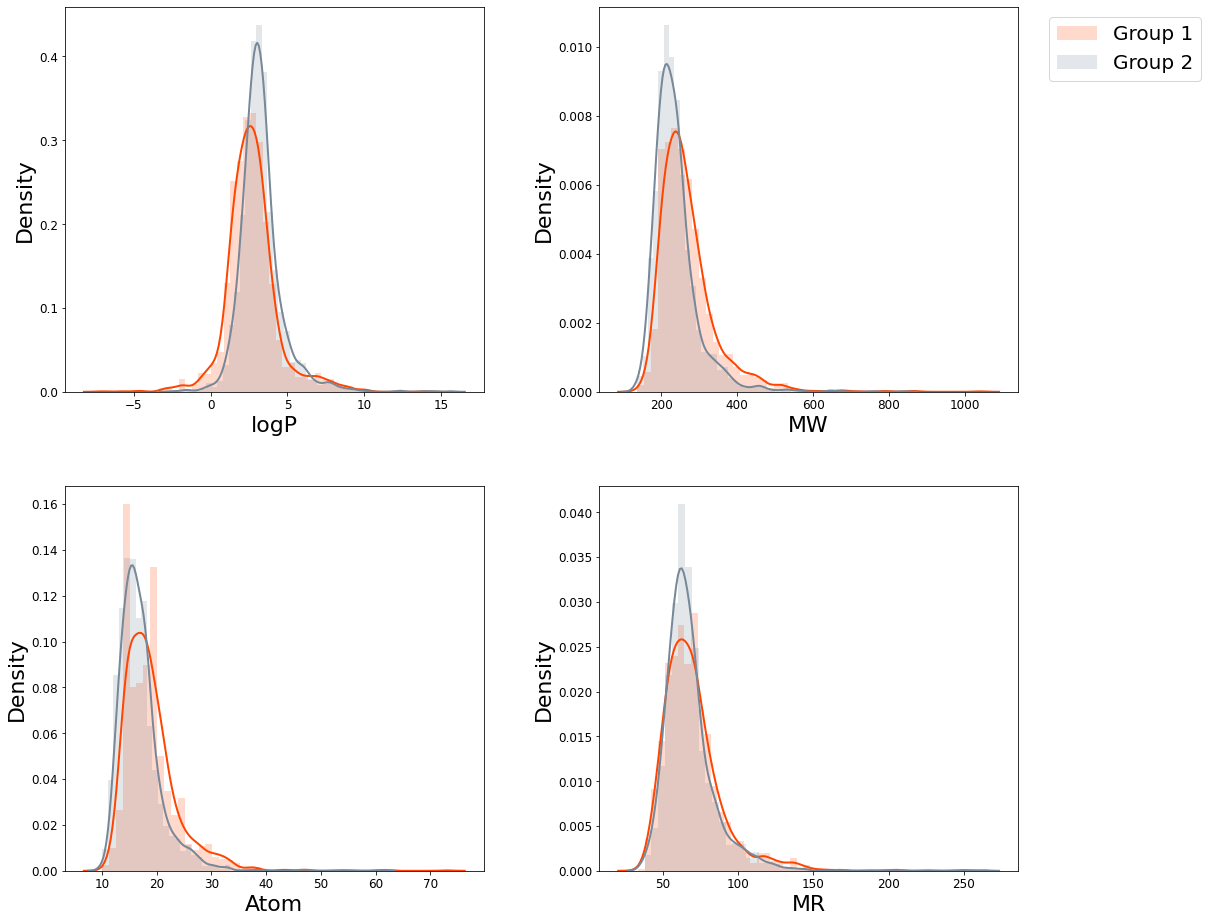

In [13]:
al = 0.2
lw = 2

plt.figure(figsize=(18, 14))
kwargs = dict(hist_kws={'alpha':al}, kde_kws={'linewidth':lw})
p = 1
for prop in ['logP', 'MW', 'Atom', 'MR']:
    plt.subplot(2, 2, p)
    sns.distplot(g1[prop], color="orangered", label="Group 1", **kwargs)
    sns.distplot(g2[prop], color="lightslategrey", label="Group 2", **kwargs)
    plt.xlabel(prop, fontsize=22)
    plt.ylabel('Density', fontsize=22)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if p == 2:
        plt.legend(bbox_to_anchor=(1.05, 1.0), 
                   loc='upper left', 
                   fontsize=20)
    else:
        plt.legend([],[], frameon=False)
    p += 1
    
plt.tight_layout(pad=5)
plt.show()

In [14]:
def make_fp(inputs):
    smi, method = inputs
    mol = Chem.MolFromSmiles(smi)
    if method == 'Morgan':
        fp = np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024)).tolist()
    elif method == 'MACCS':
        fp = np.array(MACCSkeys.GenMACCSKeys(mol)).tolist()
    elif method == 'RDKit':
        fp = np.array(AllChem.RDKFingerprint(mol)).tolist()
    return fp

In [15]:
ms = 50
al = 0.8

In [16]:
pcadfs = []
tsnedfs = []
for method in ['Morgan', 'MACCS', 'RDKit']:
    fps = parmap.map(make_fp, [[smi, method] for smi in df['SMILES'].tolist()], 
                      pm_pbar=True, pm_processes=10)
    
    pca = PCA(n_components=2)
    pcafps = pca.fit_transform(fps)
    
    tsne = TSNE(n_components=2, n_jobs=-1)
    tsnefps = tsne.fit_transform(fps)
    
    pcadf = pd.DataFrame({'X':pcafps[:,0], 'Y':pcafps[:,1], 
                          'logP':df['logP'].tolist(), 
                          'MW':df['MW'].tolist(), 
                          'Atom':df['Atom'].tolist(), 
                          'MR':df['MR'].tolist(), 
                          'Group':df['Group'].tolist()})
    tsnedf = pd.DataFrame({'X':tsnefps[:,0], 'Y':tsnefps[:,1], 
                           'logP':df['logP'].tolist(), 
                           'MW':df['MW'].tolist(), 
                           'Atom':df['Atom'].tolist(), 
                           'MR':df['MR'].tolist(), 
                           'Group':df['Group'].tolist()})
    
    pcadfs.append(pcadf)
    tsnedfs.append(tsnedf)        

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

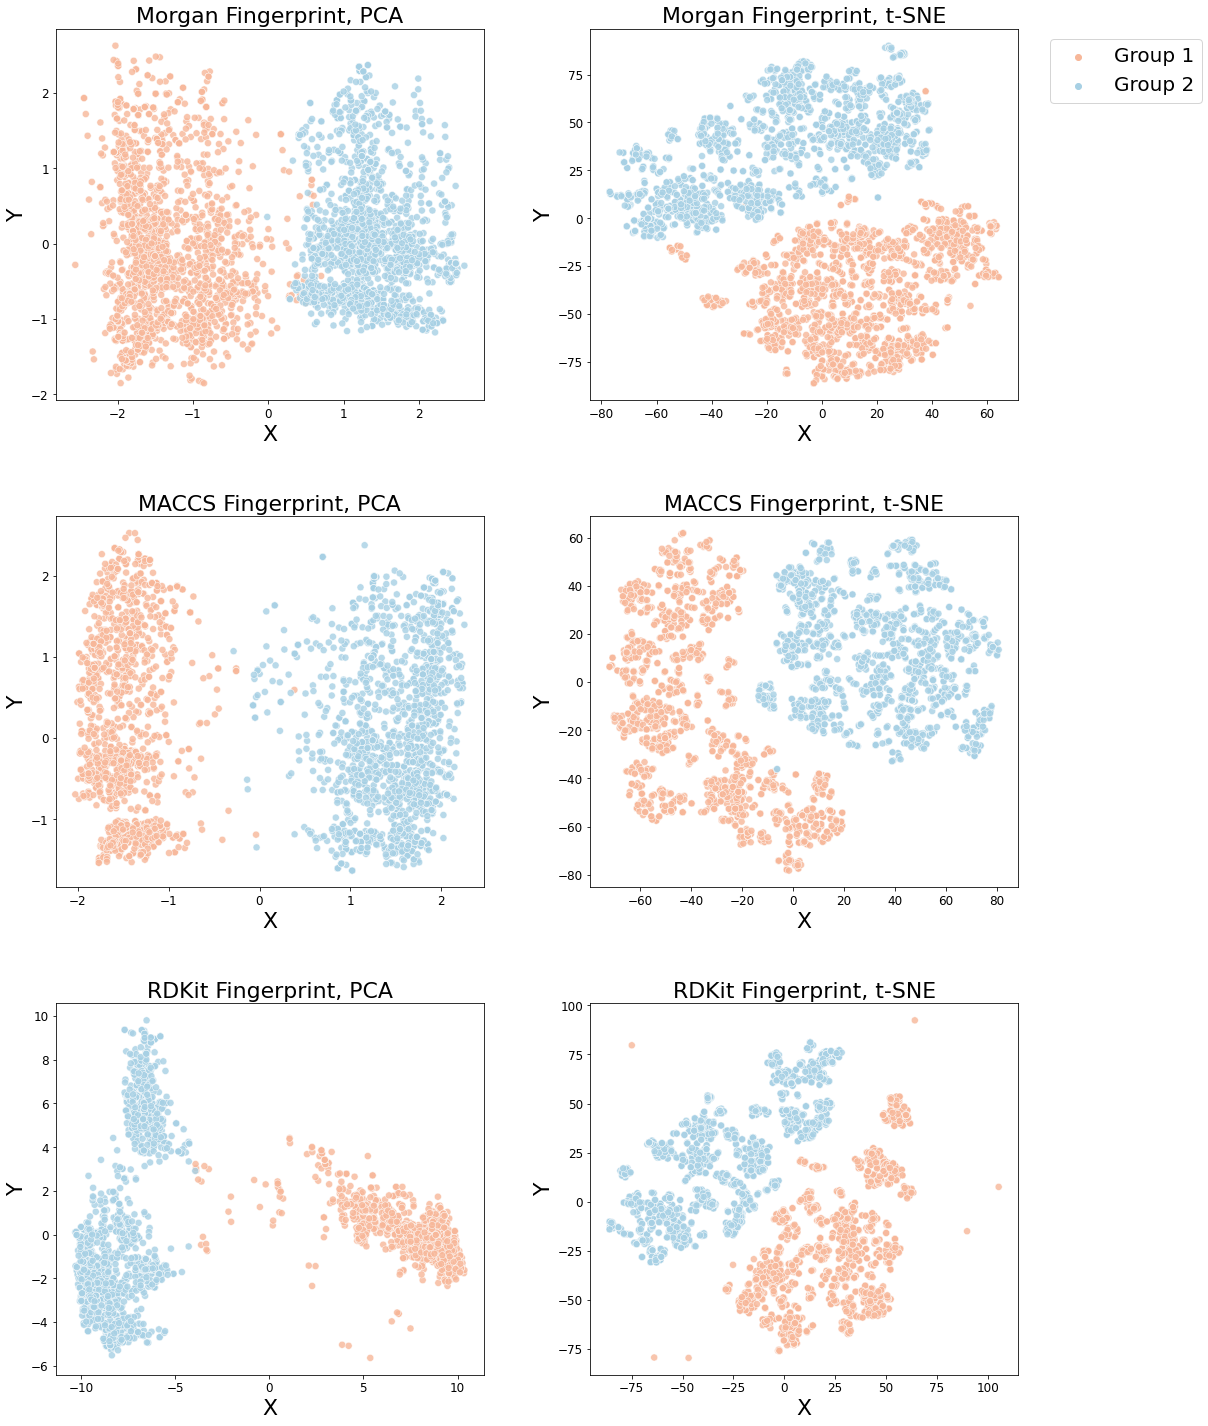

In [17]:
plt.figure(figsize=(18, 21))
p = 1
for method, pcadf, tsnedf in zip(['Morgan', 'MACCS', 'RDKit'], pcadfs, tsnedfs):

    plt.subplot(3, 2, p)
    plt.title(f'{method} Fingerprint, PCA', fontsize=22)
    sns.scatterplot(x='X', y='Y', hue='Group', palette='RdBu', data=pcadf, s=ms, alpha=al)
    plt.xlabel('X', fontsize=22)
    plt.ylabel('Y', fontsize=22)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend([],[], frameon=False)
    p += 1
    
    plt.subplot(3, 2, p)
    plt.title(f'{method} Fingerprint, t-SNE', fontsize=22)
    sns.scatterplot(x='X', y='Y', hue='Group', palette='RdBu', data=tsnedf, s=ms, alpha=al)
    plt.xlabel('X', fontsize=22)
    plt.ylabel('Y', fontsize=22)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if p == 2:
        plt.legend(bbox_to_anchor=(1.05, 1.0), 
                   loc='upper left', 
                   fontsize=20)
    else:
        plt.legend([],[], frameon=False)
    p += 1
    
plt.tight_layout(pad=5)
plt.show()

In [18]:
scaffs1 = []
for s in g1['SMILES'].tolist():
    try:
        sc = GetScaffoldForMol(Chem.MolFromSmiles(s))
        scaffs1.append(Chem.MolToSmiles(sc))
    except:
        continue

In [19]:
scaffs2 = []
for s in g2['SMILES'].tolist():
    try:
        sc = GetScaffoldForMol(Chem.MolFromSmiles(s))
        scaffs2.append(Chem.MolToSmiles(sc))
    except:
        continue

In [20]:
scaffdf1 = pd.DataFrame({'SMILES':[sc for sc in scaffs1], 'Count':[scaffs1.count(sc) for sc in scaffs1]})
scaffdf2 = pd.DataFrame({'SMILES':[sc for sc in scaffs2], 'Count':[scaffs2.count(sc) for sc in scaffs2]})
g1['Scaffold'] = scaffdf1['SMILES'].tolist()
g2['Scaffold'] = scaffdf2['SMILES'].tolist()

scaffdf1 = scaffdf1.sort_values(['Count'], ascending=False).drop_duplicates(['SMILES']).reset_index(drop=True)
scaffdf2 = scaffdf2.sort_values(['Count'], ascending=False).drop_duplicates(['SMILES']).reset_index(drop=True)

In [21]:
comscaffs = []
for sc in scaffdf1['SMILES'].tolist():
    if sc in scaffdf2['SMILES'].tolist():
        print(sc)
        comscaffs.append(sc)

c1ccccc1
c1ccccc1.c1ccccc1
c1ccc(-c2ccccc2)cc1
O=C1C=CC(=O)C(Cc2ccccc2)=C1


In [22]:
scaffdf1

SMILES  Count
0                                  c1ccccc1   1290
1                    O=C(Oc1ccccc1)c1ccccc1    201
2                       c1ccc(Oc2ccccc2)cc1    129
3                      c1ccc(COc2ccccc2)cc1     37
4                         c1ccccc1.c1ccccc1     24
..                                      ...    ...
149                    c1cc2cc-2c1.c1ccccc1      1
150           C1=CCC(Oc2ccccc2C2=CC=CC2)=C1      1
151  O=C(Oc1ccccc1)c1ccc(C(=O)Oc2ccccc2)cc1      1
152             O=C1OCCCC/C=C\CCCOc2ccccc21      1
153                    C1=CCC(Oc2ccccc2)=C1      1

[154 rows x 2 columns]

In [23]:
scaffdf2

SMILES  Count
0                            c1ccccc1   1360
1                 c1ccc(-c2ccccc2)cc1     94
2                  c1ccc(C2CCCCC2)cc1     61
3                 c1ccc(Cc2ccccc2)cc1     60
4                     c1ccc(C2CC2)cc1     38
..                                ...    ...
113                C(#CC1CC1)c1ccccc1      1
114              O=C1CCCCC1=Cc1ccccc1      1
115        c1cc(C2CCCCC2)ccc1C1CCCCC1      1
116  c1ccc(CCCC(c2ccccc2)c2ccccc2)cc1      1
117                   C1=CCc2ccccc2C1      1

[118 rows x 2 columns]

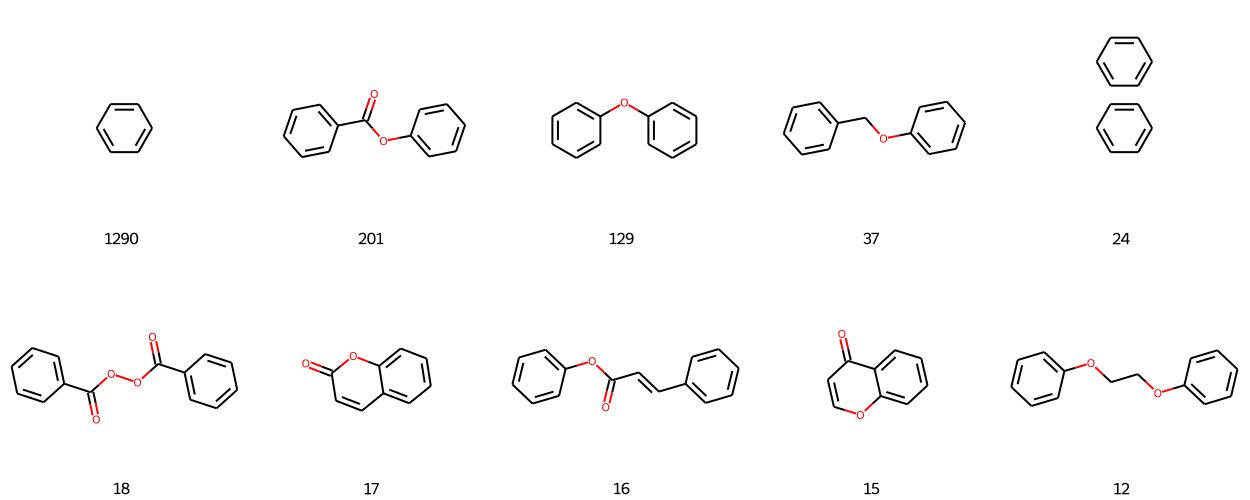

In [24]:
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in scaffdf1[scaffdf1['Count'] > 10]['SMILES'].tolist()], 
                     subImgSize=(250,250), 
                     molsPerRow=5, 
                     legends=[str(c) for c in scaffdf1[scaffdf1['Count'] > 10]['Count'].tolist()], 
                     maxMols=1000)

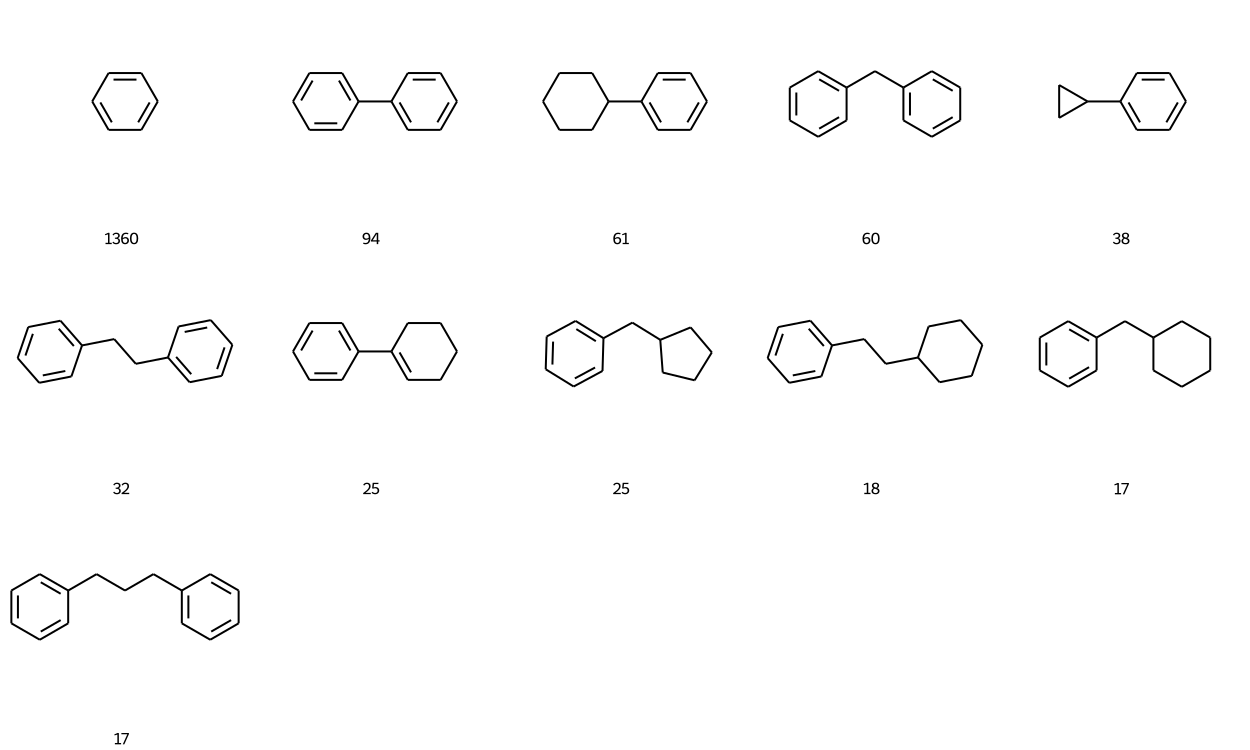

In [25]:
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in scaffdf2[scaffdf2['Count'] > 10]['SMILES'].tolist()], 
                     subImgSize=(250,250), 
                     molsPerRow=5, 
                     legends=[str(c) for c in scaffdf2[scaffdf2['Count'] > 10]['Count'].tolist()], 
                     maxMols=1000)

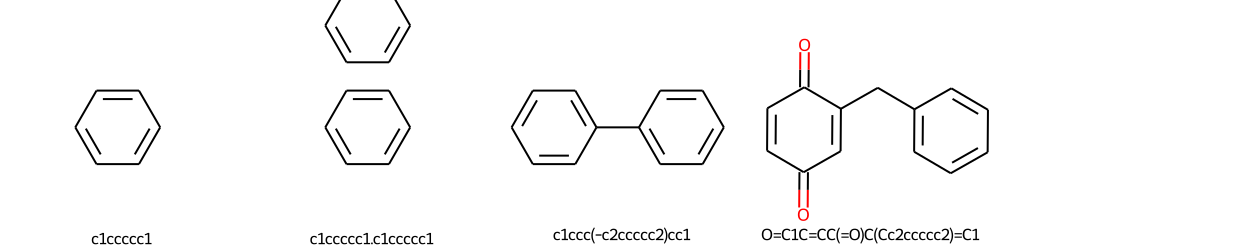

In [26]:
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in comscaffs], 
                     subImgSize=(250,250), 
                     molsPerRow=5, 
                     legends=comscaffs, 
                     maxMols=1000)

In [27]:
maincommscaff = 'O=C1C=CC(=O)C(Cc2ccccc2)=C1'

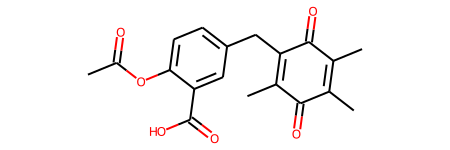

In [28]:
for smi in g1[g1['Scaffold'] == maincommscaff]['SMILES'].tolist():
    display(Chem.MolFromSmiles(smi))

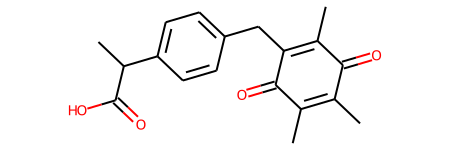

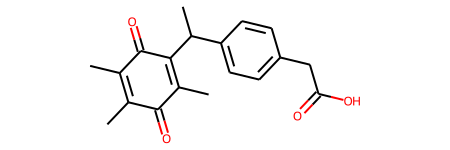

In [29]:
for smi in g2[g2['Scaffold'] == maincommscaff]['SMILES'].tolist():
    display(Chem.MolFromSmiles(smi))

In [30]:
scaffdf1['Group'] = 'Scaffolds of Group 1'
scaffdf1 = pd.concat([g1, scaffdf1]).reset_index(drop=True)
scaffdf2['Group'] = 'Scaffolds of Group 2'
scaffdf2 = pd.concat([g2, scaffdf2]).reset_index(drop=True)
scaffdf = pd.concat([scaffdf1, scaffdf2]).reset_index(drop=True)

In [31]:
mainpcadfs = []
maintsnedfs = []
scaffpcadfs = []
scafftsnedfs = []
for method in ['Morgan', 'MACCS', 'RDKit']:
    fps = parmap.map(make_fp, [[smi, method] for smi in scaffdf['SMILES'].tolist()], 
                      pm_pbar=True, pm_processes=10)
    
    pca = PCA(n_components=2)
    pcafps = pca.fit_transform(fps)
    
    tsne = TSNE(n_components=2, n_jobs=-1)
    tsnefps = tsne.fit_transform(fps)
    
    pcadf = pd.DataFrame({'X':pcafps[:,0], 'Y':pcafps[:,1], 
                          'Group':scaffdf['Group'].tolist(), 
                          'SMILES':scaffdf['SMILES'].tolist(), 
                          'Scaffold':scaffdf['Scaffold'].tolist()})
    tsnedf = pd.DataFrame({'X':tsnefps[:,0], 'Y':tsnefps[:,1], 
                          'Group':scaffdf['Group'].tolist(), 
                          'SMILES':scaffdf['SMILES'].tolist(), 
                          'Scaffold':scaffdf['Scaffold'].tolist()})
    
    mainpcadf = pcadf[pcadf['Scaffold'] == maincommscaff].reset_index(drop=True)
    maintsnedf = tsnedf[tsnedf['Scaffold'] == maincommscaff].reset_index(drop=True)
    
    mainpcadfs.append(mainpcadf)
    maintsnedfs.append(maintsnedf)
    scaffpcadfs.append(pcadf)
    scafftsnedfs.append(tsnedf)        

  0%|          | 0/4272 [00:00<?, ?it/s]

  0%|          | 0/4272 [00:00<?, ?it/s]

  0%|          | 0/4272 [00:00<?, ?it/s]

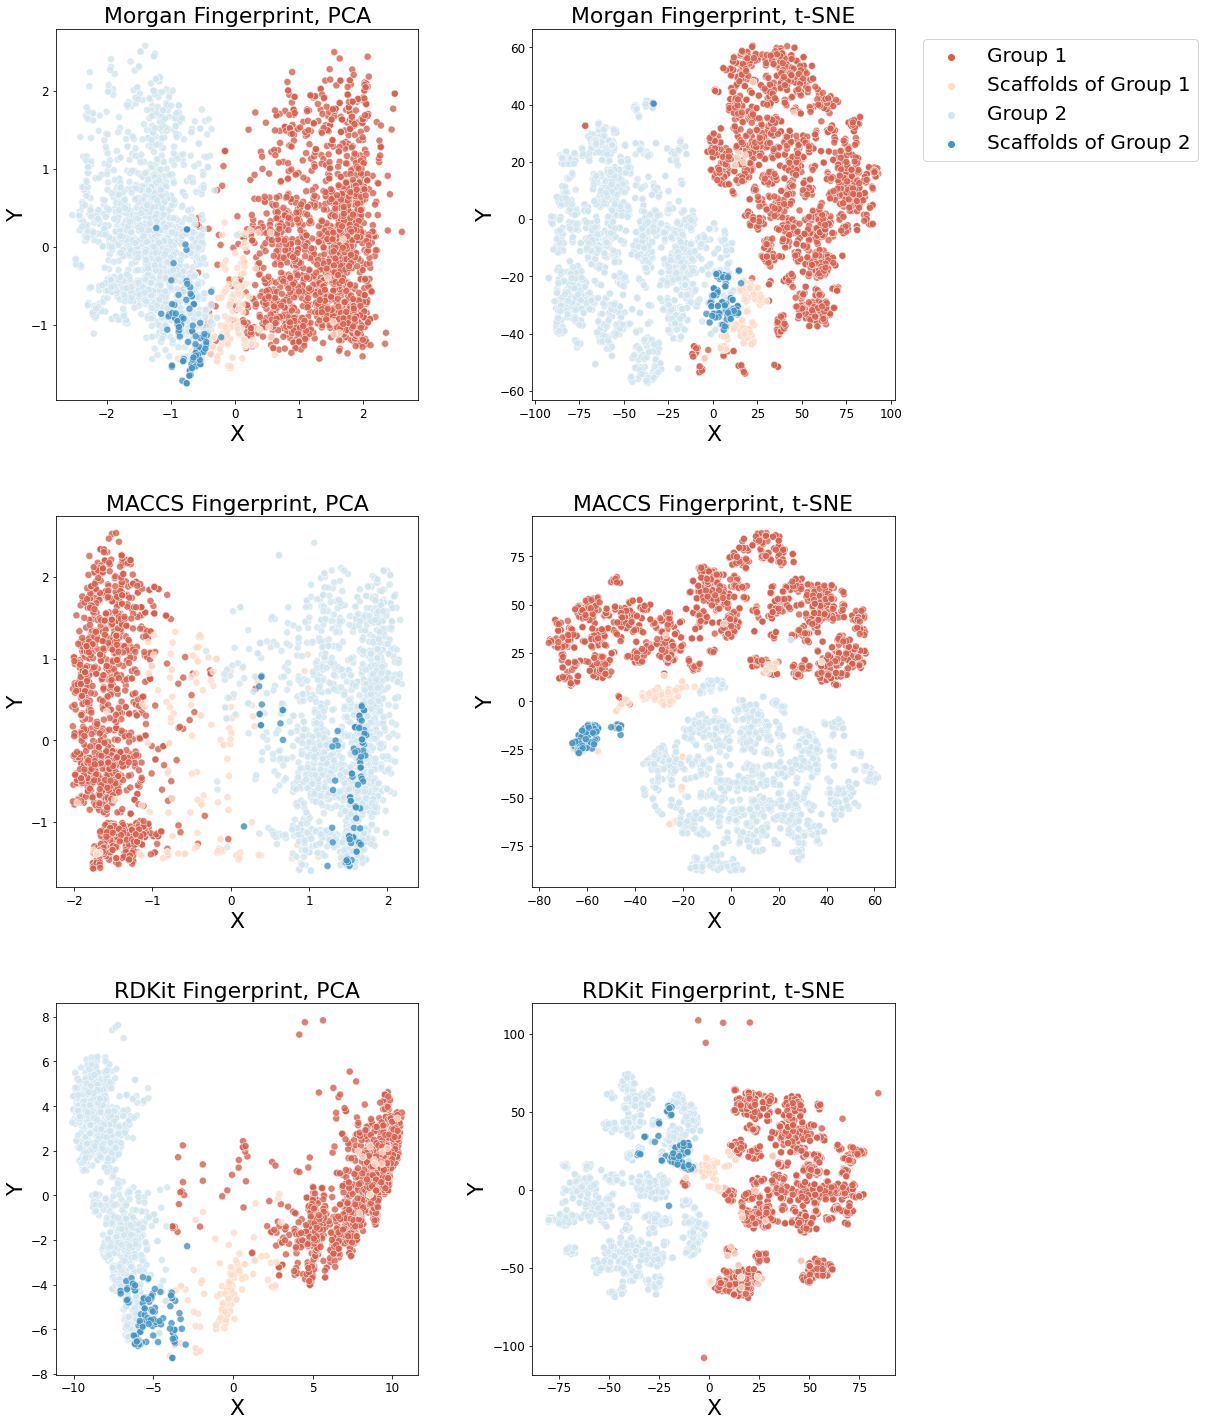

In [32]:
plt.figure(figsize=(18, 21))
p = 1
for method, pcadf, tsnedf in zip(['Morgan', 'MACCS', 'RDKit'], scaffpcadfs, scafftsnedfs):

    plt.subplot(3, 2, p)
    plt.title(f'{method} Fingerprint, PCA', fontsize=22)
    sns.scatterplot(x='X', y='Y', hue='Group', palette='RdBu', data=pcadf, s=ms, alpha=al)
    plt.xlabel('X', fontsize=22)
    plt.ylabel('Y', fontsize=22)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend([],[], frameon=False)
    p += 1
    
    plt.subplot(3, 2, p)
    plt.title(f'{method} Fingerprint, t-SNE', fontsize=22)
    sns.scatterplot(x='X', y='Y', hue='Group', palette='RdBu', data=tsnedf, s=ms, alpha=al)
    plt.xlabel('X', fontsize=22)
    plt.ylabel('Y', fontsize=22)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if p == 2:
        plt.legend(bbox_to_anchor=(1.05, 1.0), 
                   loc='upper left', 
                   fontsize=20)
    else:
        plt.legend([],[], frameon=False)
    p += 1
    
plt.tight_layout(pad=5)
plt.show()

In [33]:
ms = 20
al = 0.4

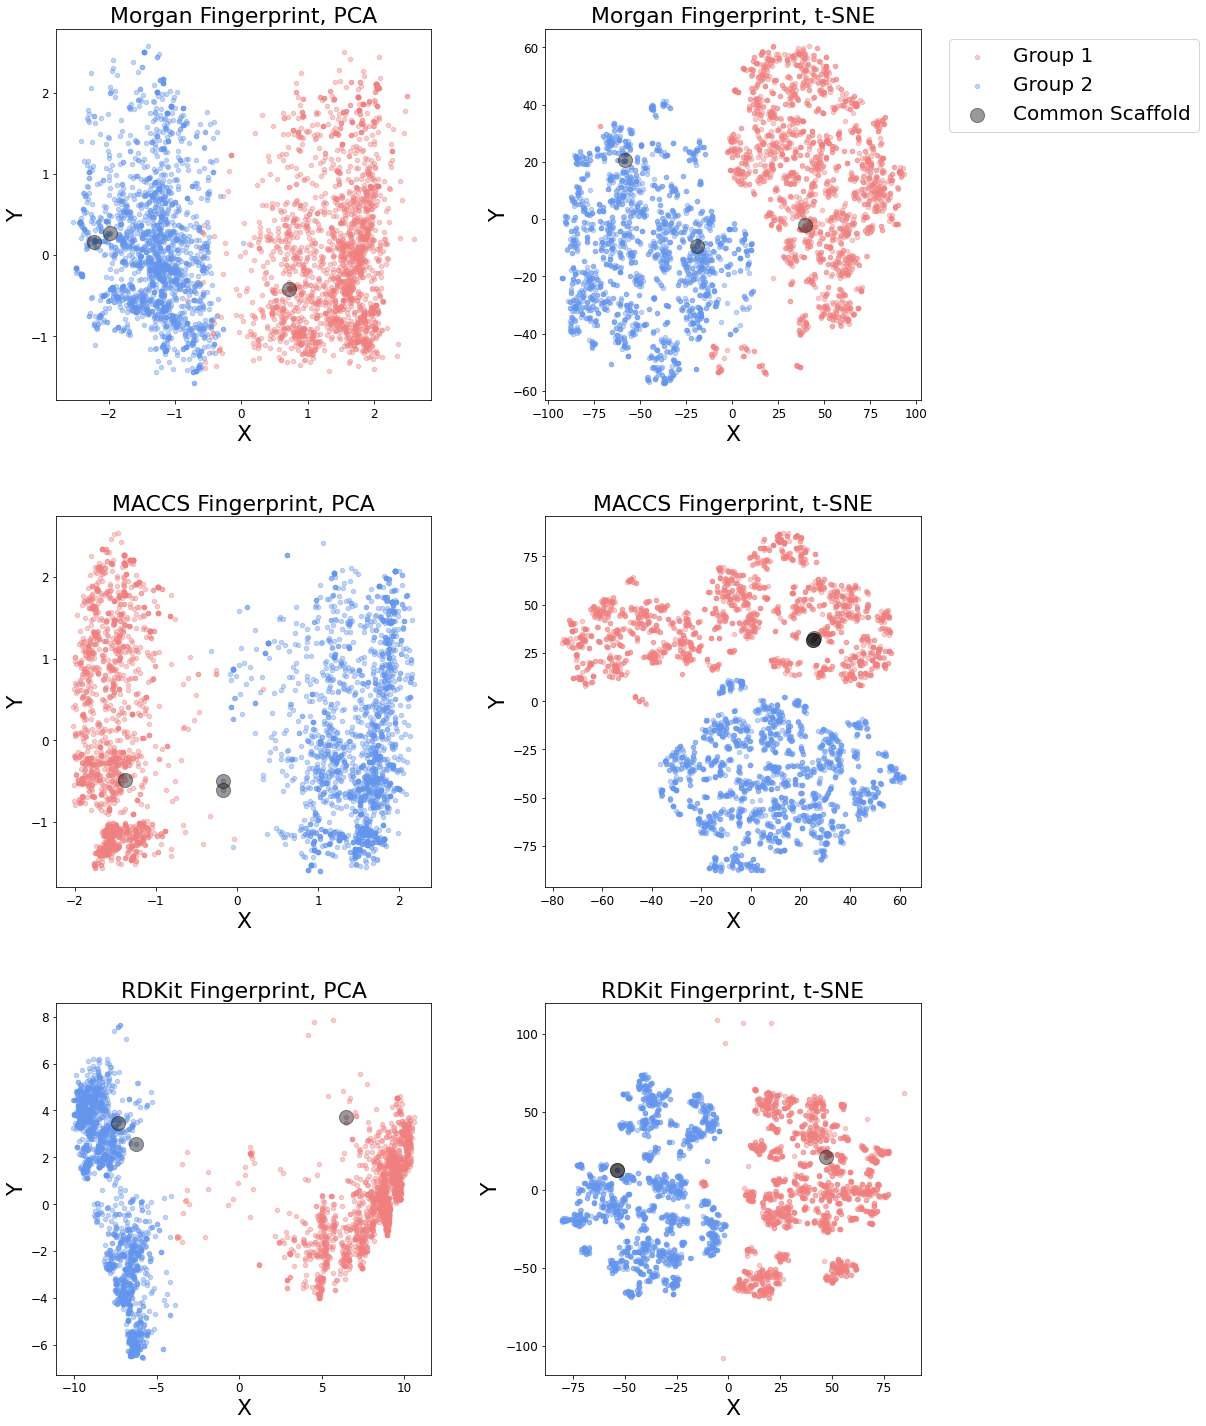

In [34]:
plt.figure(figsize=(18, 21))
p = 1
for method, mainpcadf, maintsnedf, pcadf, tsnedf in zip(['Morgan', 'MACCS', 'RDKit'], mainpcadfs, maintsnedfs, scaffpcadfs, scafftsnedfs):
    grpca1 = pcadf[pcadf['Group'] == 'Group 1'].reset_index(drop=True)
    grpca2 = pcadf[pcadf['Group'] == 'Group 2'].reset_index(drop=True)
    grtsne1 = tsnedf[tsnedf['Group'] == 'Group 1'].reset_index(drop=True)
    grtsne2 = tsnedf[tsnedf['Group'] == 'Group 2'].reset_index(drop=True)
    
    plt.subplot(3, 2, p)
    plt.title(f'{method} Fingerprint, PCA', fontsize=22)
    plt.scatter(grpca1['X'], grpca1['Y'], c='lightcoral', s=ms, alpha=al)
    plt.scatter(grpca2['X'], grpca2['Y'], c='cornflowerblue', s=ms, alpha=al)
    plt.scatter(mainpcadf['X'], mainpcadf['Y'], c='black', s=ms*10, alpha=al)
    plt.xlabel('X', fontsize=22)
    plt.ylabel('Y', fontsize=22)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend([],[], frameon=False)
    p += 1
    
    plt.subplot(3, 2, p)
    plt.title(f'{method} Fingerprint, t-SNE', fontsize=22)
    plt.scatter(grtsne1['X'], grtsne1['Y'], c='lightcoral', s=ms, alpha=al, label='Group 1')
    plt.scatter(grtsne2['X'], grtsne2['Y'], c='cornflowerblue', s=ms, alpha=al, label='Group 2')
    plt.scatter(maintsnedf['X'], maintsnedf['Y'], c='black', s=ms*10, alpha=al, label='Common Scaffold')
    plt.xlabel('X', fontsize=22)
    plt.ylabel('Y', fontsize=22)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if p == 2:
        plt.legend(bbox_to_anchor=(1.05, 1.0), 
                   loc='upper left', 
                   fontsize=20)
    else:
        plt.legend([],[], frameon=False)
    p += 1
    
plt.tight_layout(pad=5)
plt.show()

In [35]:
closepcadfs = []
for method, mainpcadf, maintsnedf, pcadf, tsnedf in zip(['Morgan', 'MACCS', 'RDKit'], mainpcadfs, maintsnedfs, scaffpcadfs, scafftsnedfs):
    pcadf['Close'] = 0
    for i in tqdm(range(pcadf.shape[0])):
        for m in range(mainpcadf.shape[0]):
            if dist(pcadf[['X', 'Y']].iloc[i].tolist(), mainpcadf[['X', 'Y']].iloc[m].tolist()) < 0.2:
                pcadf['Close'].iloc[i] = 1
    closepcadf = pcadf[pcadf['Close'] == 1].reset_index(drop=True)
    closepcadfs.append(closepcadf)

  0%|          | 0/4272 [00:00<?, ?it/s]

  0%|          | 0/4272 [00:00<?, ?it/s]

  0%|          | 0/4272 [00:00<?, ?it/s]

In [36]:
closetsnedfs = []
for method, mainpcadf, maintsnedf, pcadf, tsnedf in zip(['Morgan', 'MACCS', 'RDKit'], mainpcadfs, maintsnedfs, scaffpcadfs, scafftsnedfs):
    tsnedf['Close'] = 0
    for i in tqdm(range(tsnedf.shape[0])):
        for m in range(maintsnedf.shape[0]):
            if dist(tsnedf[['X', 'Y']].iloc[i].tolist(), maintsnedf[['X', 'Y']].iloc[m].tolist()) < 5:
                tsnedf['Close'].iloc[i] = 1
    closetsnedf = tsnedf[tsnedf['Close'] == 1].reset_index(drop=True)
    closetsnedfs.append(closetsnedf)

  0%|          | 0/4272 [00:00<?, ?it/s]

  0%|          | 0/4272 [00:00<?, ?it/s]

  0%|          | 0/4272 [00:00<?, ?it/s]

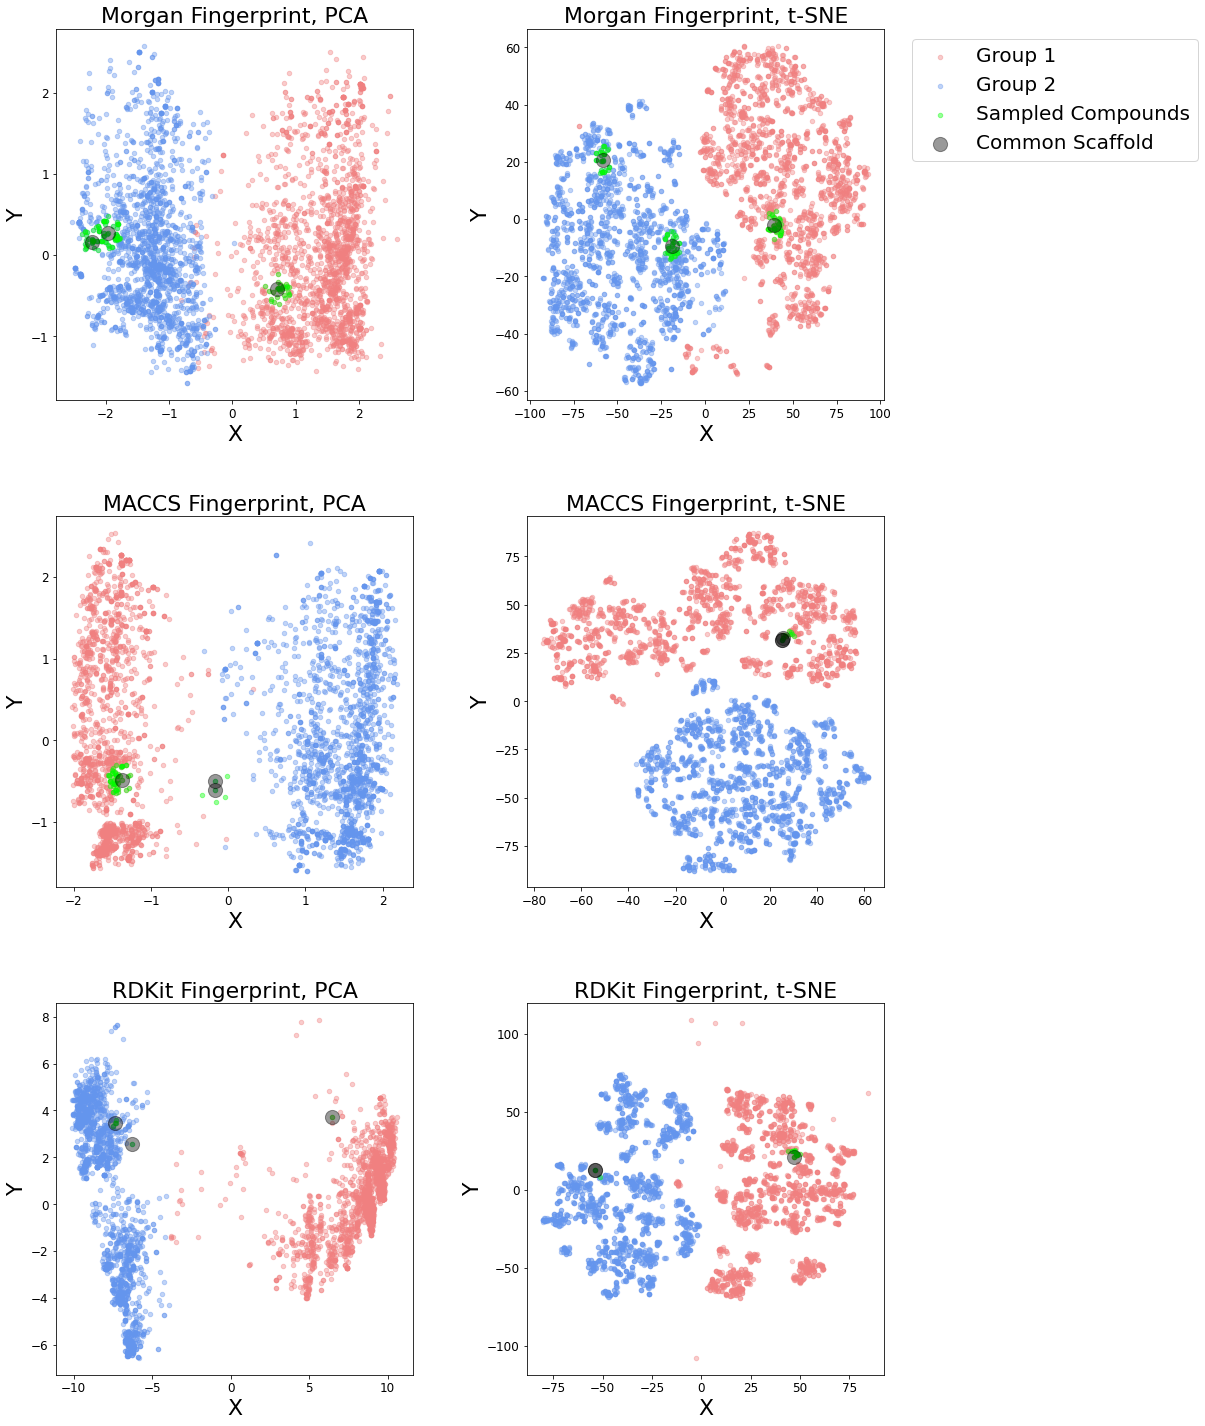

In [37]:
plt.figure(figsize=(18, 21))
p = 1
for method, mainpcadf, maintsnedf, clpcadf, cltsnedf, pcadf, tsnedf in zip(['Morgan', 'MACCS', 'RDKit'], mainpcadfs, maintsnedfs, closepcadfs, closetsnedfs, scaffpcadfs, scafftsnedfs):
    grpca1 = pcadf[pcadf['Group'] == 'Group 1'].reset_index(drop=True)
    grpca2 = pcadf[pcadf['Group'] == 'Group 2'].reset_index(drop=True)
    grtsne1 = tsnedf[tsnedf['Group'] == 'Group 1'].reset_index(drop=True)
    grtsne2 = tsnedf[tsnedf['Group'] == 'Group 2'].reset_index(drop=True)
    
    plt.subplot(3, 2, p)
    plt.title(f'{method} Fingerprint, PCA', fontsize=22)
    plt.scatter(grpca1['X'], grpca1['Y'], c='lightcoral', s=ms, alpha=al)
    plt.scatter(grpca2['X'], grpca2['Y'], c='cornflowerblue', s=ms, alpha=al)
    plt.scatter(clpcadf['X'], clpcadf['Y'], c='lime', s=ms, alpha=al)
    plt.scatter(mainpcadf['X'], mainpcadf['Y'], c='black', s=ms*10, alpha=al)
    plt.xlabel('X', fontsize=22)
    plt.ylabel('Y', fontsize=22)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend([],[], frameon=False)
    p += 1
    
    plt.subplot(3, 2, p)
    plt.title(f'{method} Fingerprint, t-SNE', fontsize=22)
    plt.scatter(grtsne1['X'], grtsne1['Y'], c='lightcoral', s=ms, alpha=al, label='Group 1')
    plt.scatter(grtsne2['X'], grtsne2['Y'], c='cornflowerblue', s=ms, alpha=al, label='Group 2')
    plt.scatter(cltsnedf['X'], cltsnedf['Y'], c='lime', s=ms, alpha=al, label='Sampled Compounds')
    plt.scatter(maintsnedf['X'], maintsnedf['Y'], c='black', s=ms*10, alpha=al, label='Common Scaffold')
    plt.xlabel('X', fontsize=22)
    plt.ylabel('Y', fontsize=22)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if p == 2:
        plt.legend(bbox_to_anchor=(1.05, 1.0), 
                   loc='upper left', 
                   fontsize=20)
    else:
        plt.legend([],[], frameon=False)
    p += 1
    
plt.tight_layout(pad=5)
plt.show()

Scaffold: c1ccc(COc2ccccc2)cc1


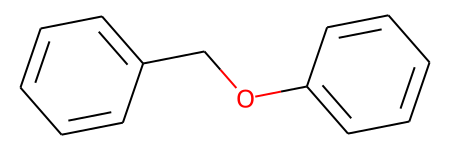

Compounds:


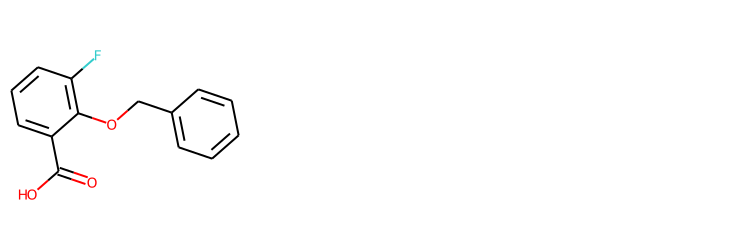

Scaffold: O=C1C=C(c2ccccc2)CCC1


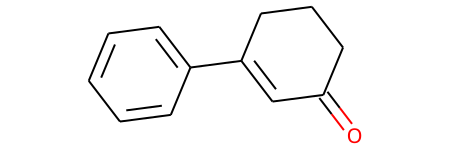

Compounds:


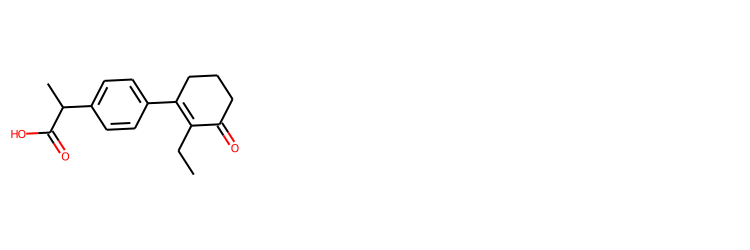

Scaffold: O=C1C=CC(=O)C(Cc2ccccc2)=C1


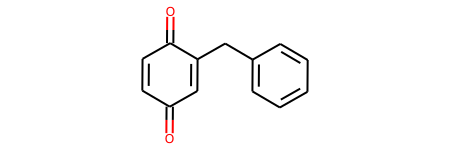

Compounds:


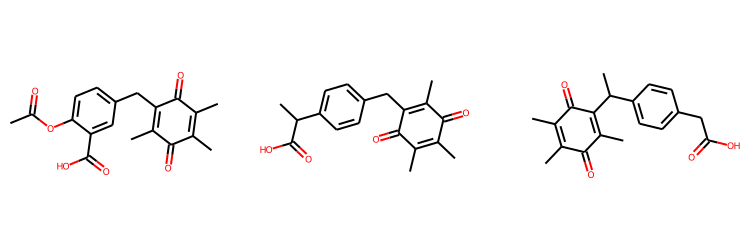

Scaffold: c1ccc(Oc2ccccc2)cc1


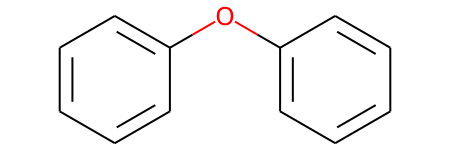

Compounds:


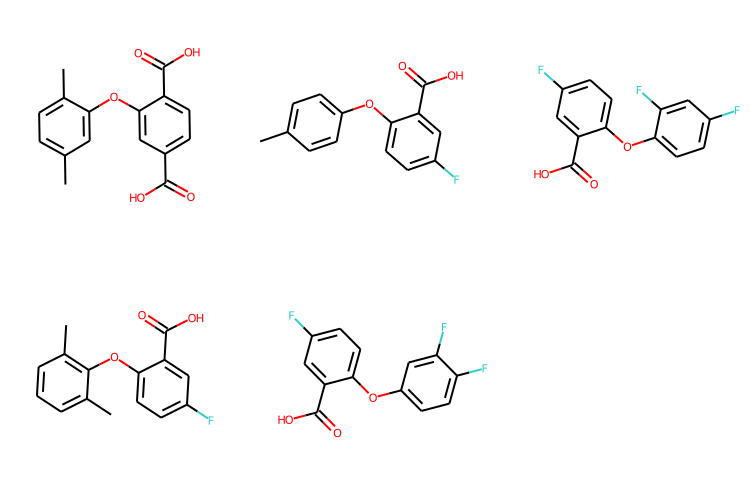

Scaffold: c1ccc(CCCc2ccccc2)cc1


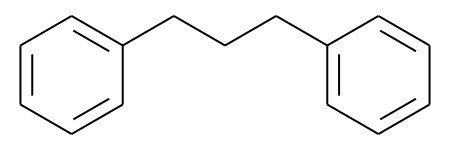

Compounds:


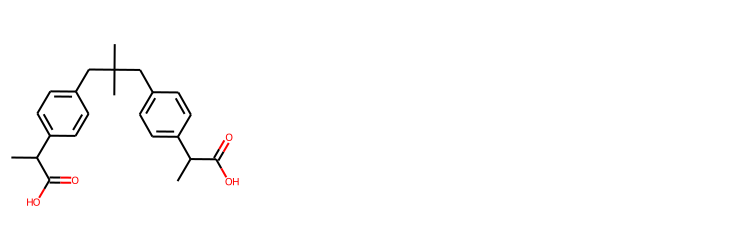

Scaffold: C1=C(c2ccccc2)CCCC1


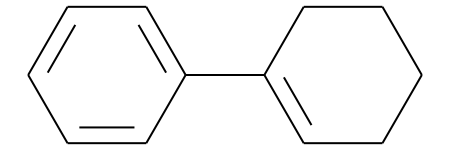

Compounds:


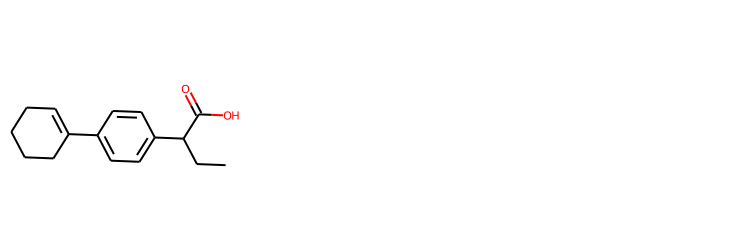

Scaffold: c1ccccc1.c1ccccc1


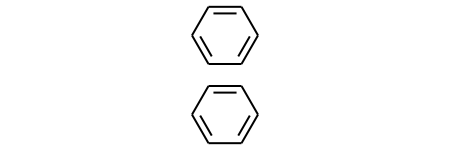

Compounds:


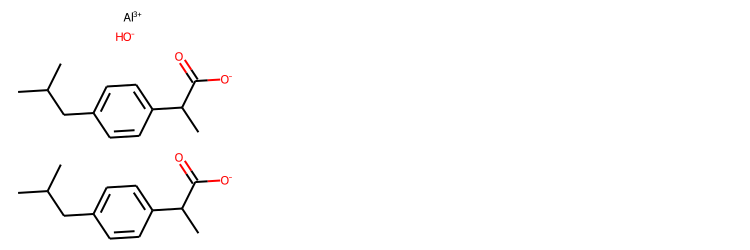

Scaffold: C1=C(c2ccccc2)CC1


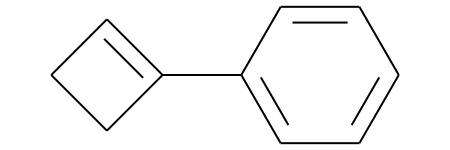

Compounds:


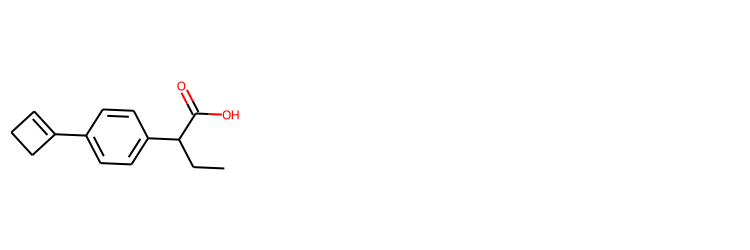

Scaffold: c1ccc([SnH]c2ccccc2)cc1.c1ccccc1


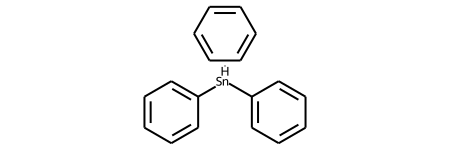

Compounds:


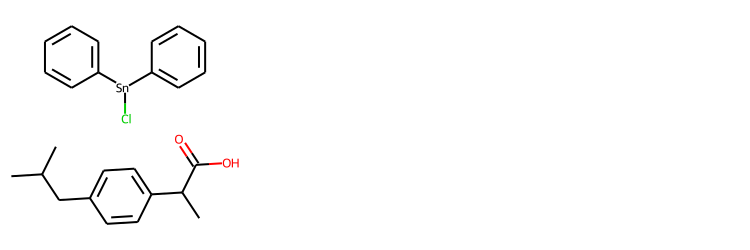

Scaffold: O=C(Oc1ccccc1)c1ccccc1


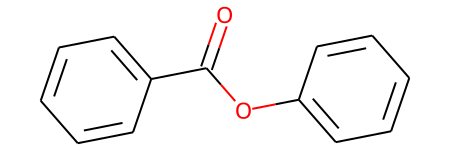

Compounds:


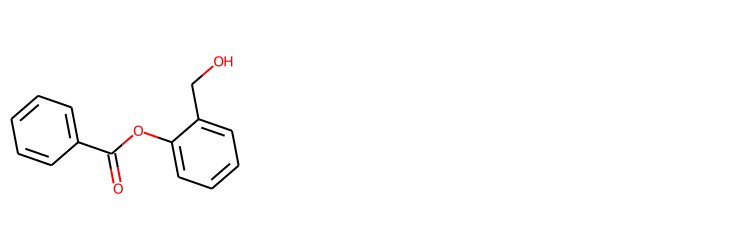

Scaffold: c1ccc(CCc2ccccc2)cc1


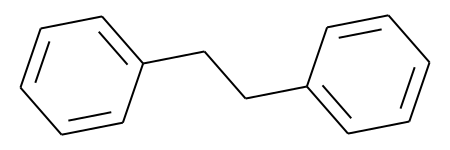

Compounds:


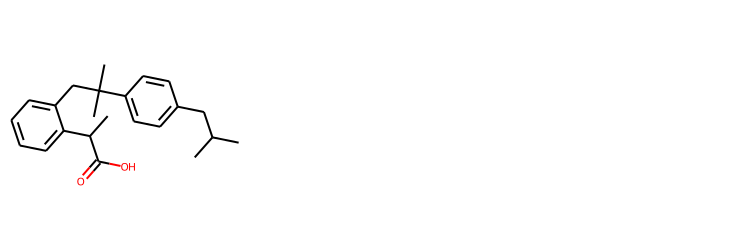

Scaffold: c1ccccc1


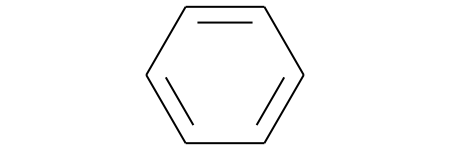

Compounds:


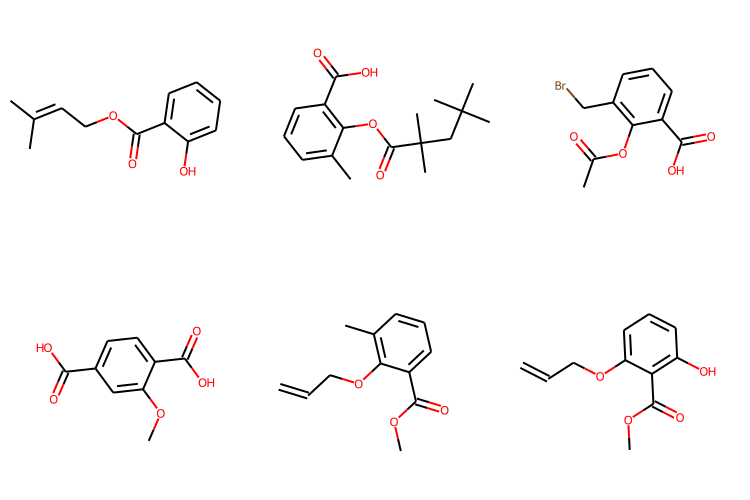

Scaffold: C1=CCC(Cc2ccccc2)=CC1


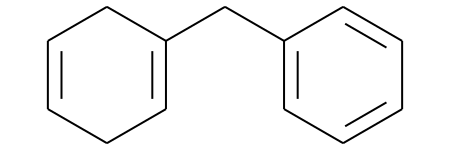

Compounds:


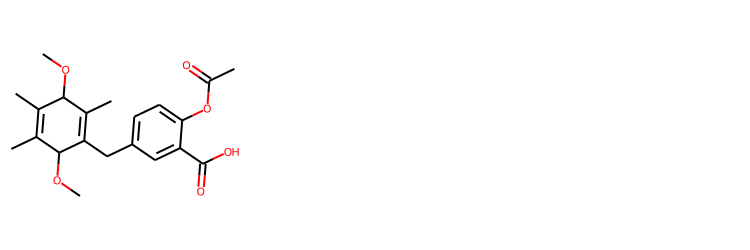

Scaffold: c1ccc(Cc2ccccc2)cc1


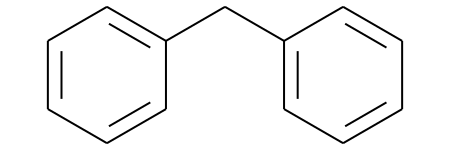

Compounds:


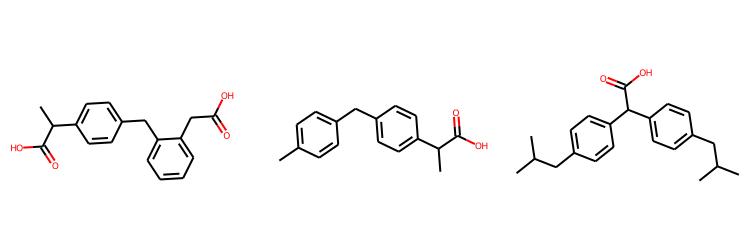

Scaffold: c1ccc(OCC2CCCCC2)cc1


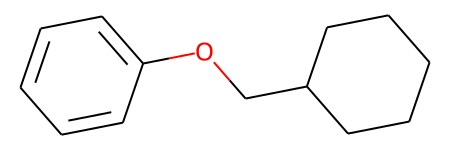

Compounds:


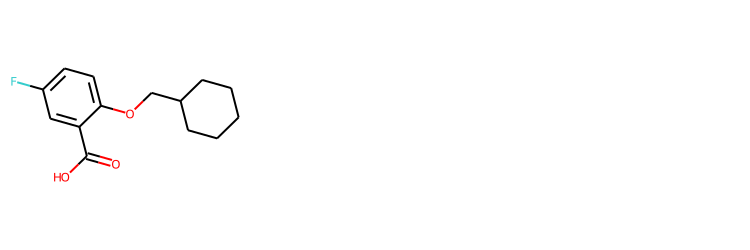

Scaffold: c1ccc(COc2ccccc2)cc1


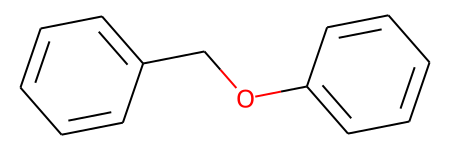

Compounds:


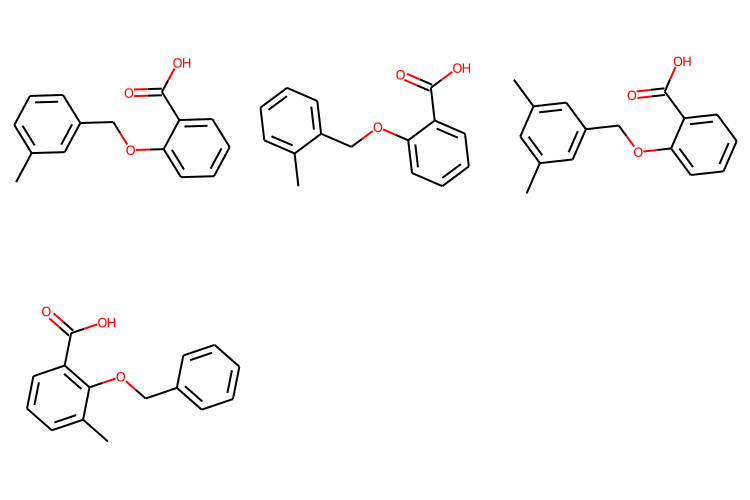

Scaffold: O=C1C=CC(=O)C(Cc2ccccc2)=C1


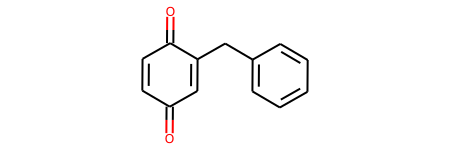

Compounds:


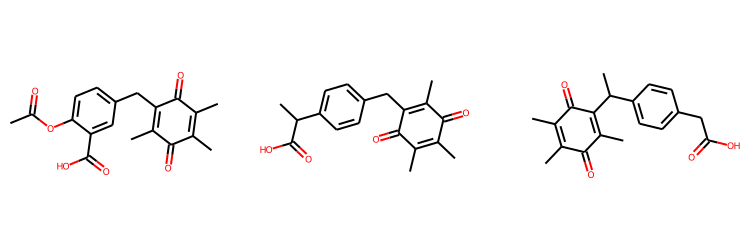

Scaffold: O=c1ccc2ccccc2o1


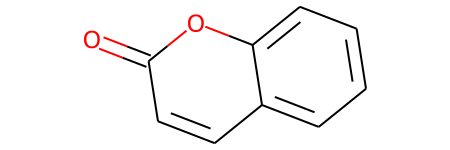

Compounds:


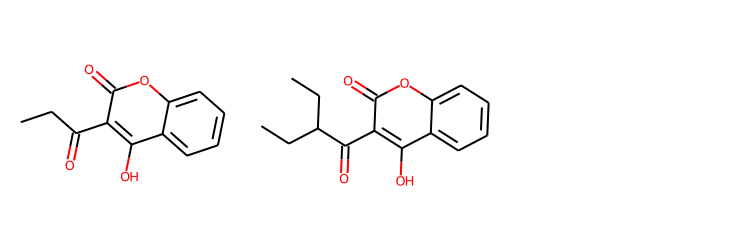

Scaffold: O=C(OOC(=O)c1ccccc1)c1ccccc1


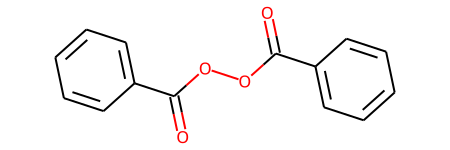

Compounds:


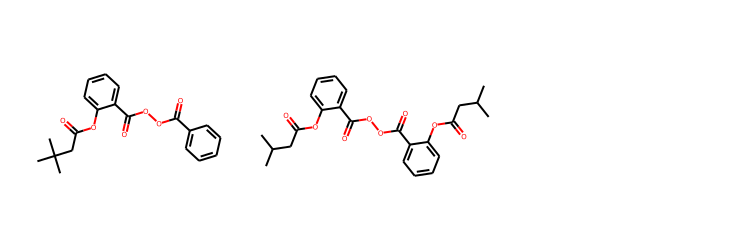

Scaffold: O=C(Oc1ccccc1)c1ccccc1


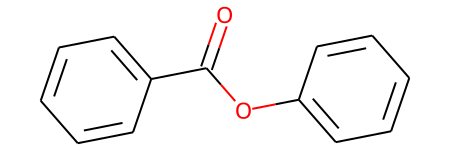

Compounds:


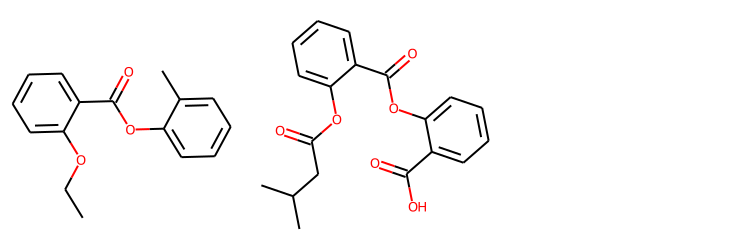

Scaffold: c1ccccc1


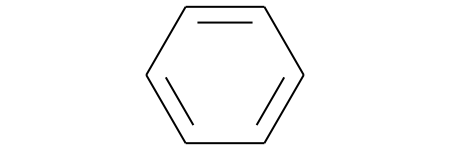

Compounds:


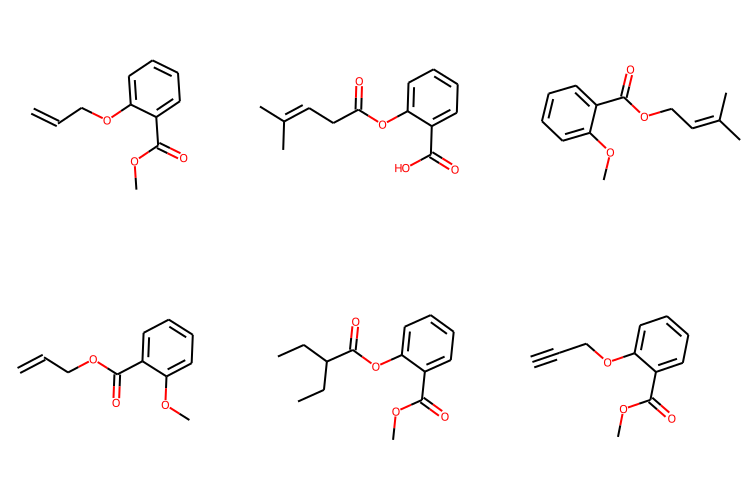

Scaffold: O=c1ccoc2ccccc12


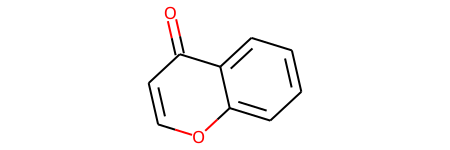

Compounds:


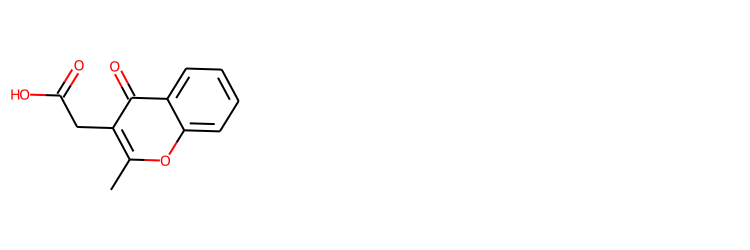

Scaffold: C1=CCC(Cc2ccccc2)=CC1


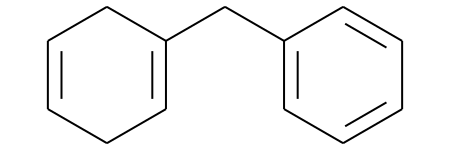

Compounds:


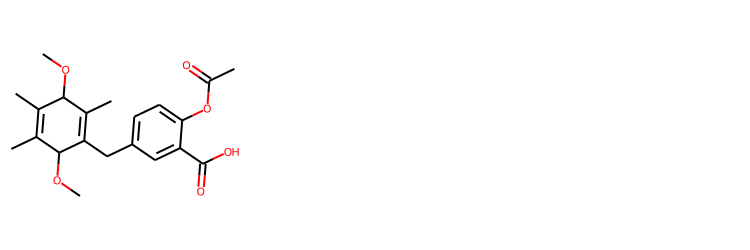

Scaffold: C1=CCc2ccccc2C1


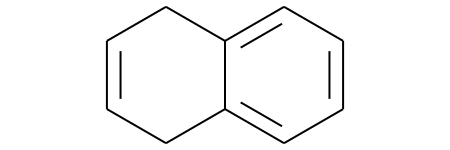

Compounds:


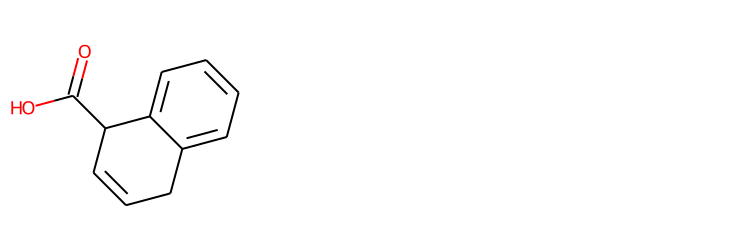

Scaffold: c1ccc(Cc2ccccc2)cc1


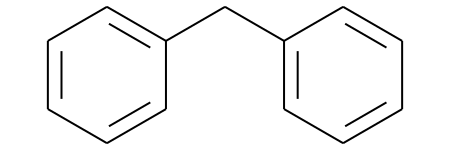

Compounds:


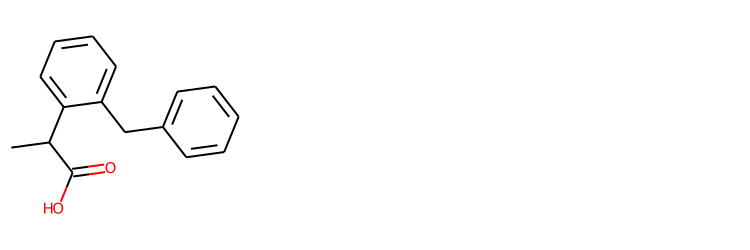

Scaffold: O=C1C=CC(=O)C(Cc2ccccc2)=C1


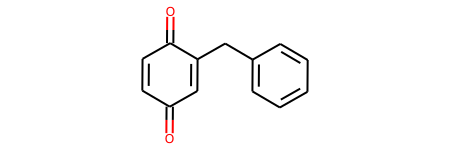

Compounds:


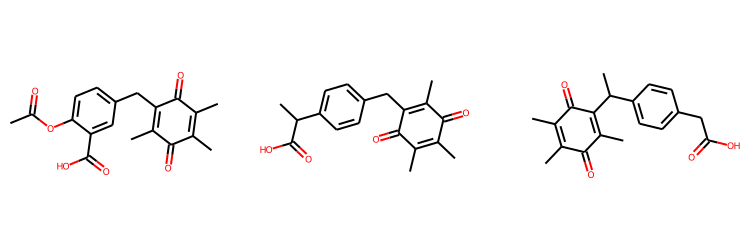

Scaffold: C1=C(c2ccccc2)CCCC1


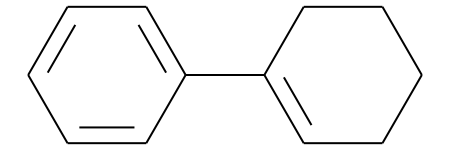

Compounds:


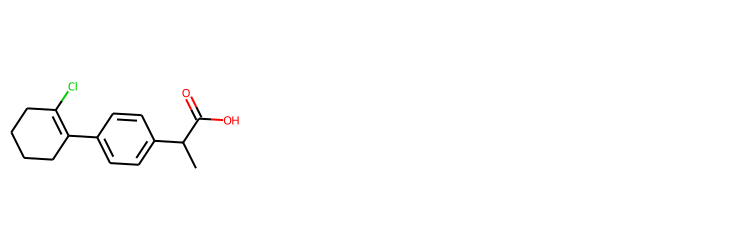

In [38]:
for clpcadf in closepcadfs:
    for scaff in list(set(clpcadf['Scaffold'].tolist())):
        if str(scaff) != 'nan':
            print('Scaffold:', scaff)
            display(Chem.MolFromSmiles(scaff))
            print('Compounds:')
            display(Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in clpcadf[clpcadf['Scaffold'] == scaff]['SMILES'].tolist()], 
                                         subImgSize=(250,250), 
                                         maxMols=6))

Scaffold: c1ccc(COc2ccccc2)cc1


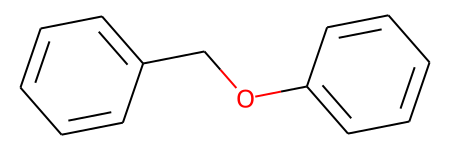

Compounds:


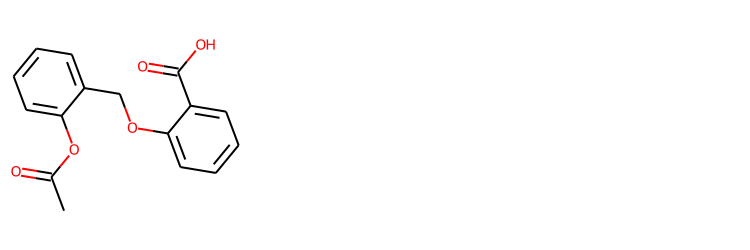

Scaffold: c1ccc(-c2ccccc2)cc1.c1ccccc1


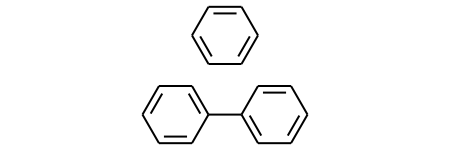

Compounds:


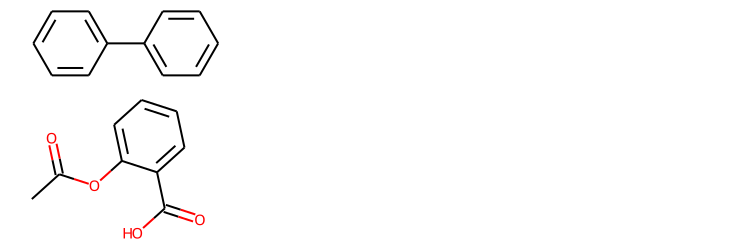

Scaffold: c1cc2cc-2c1.c1ccccc1


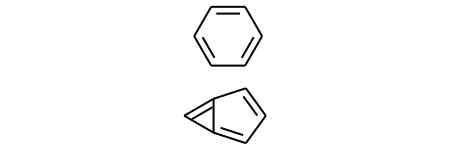

Compounds:


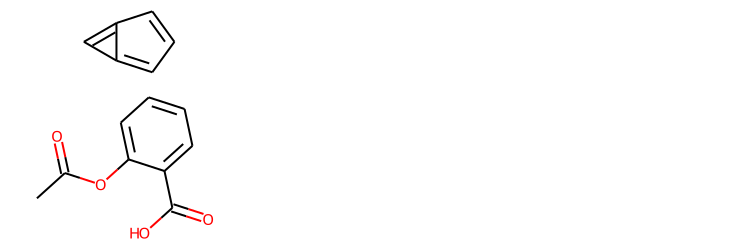

Scaffold: O=C1C=CC(=O)C(Cc2ccccc2)=C1


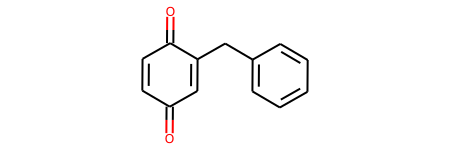

Compounds:


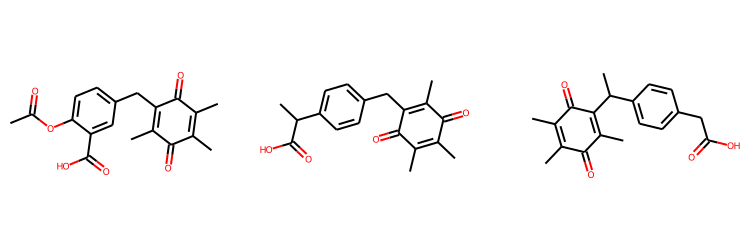

Scaffold: O=C1C=C(c2ccccc2)CCC1


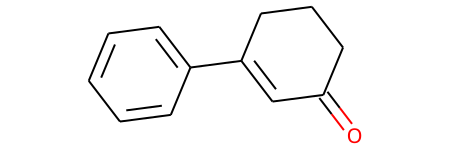

Compounds:


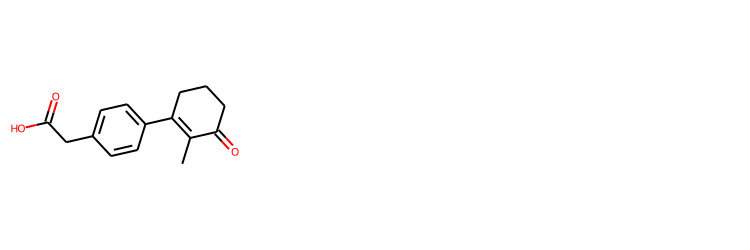

Scaffold: c1ccc(CCCc2ccccc2)cc1


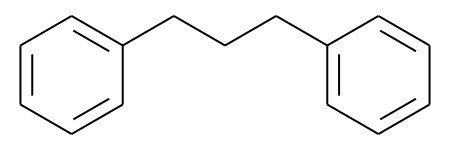

Compounds:


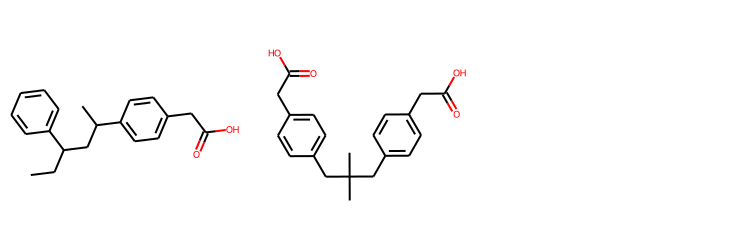

Scaffold: c1ccc(CCCCc2ccccc2)cc1


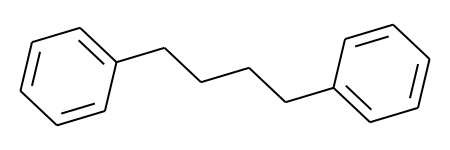

Compounds:


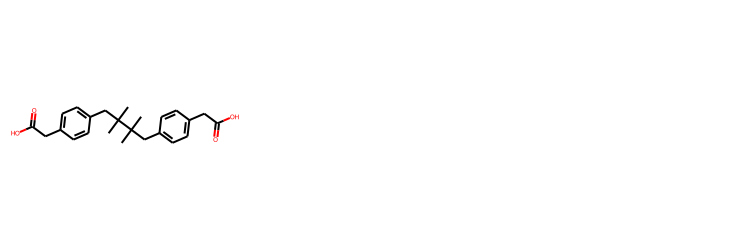

Scaffold: c1ccc(C2CCCCC2)cc1


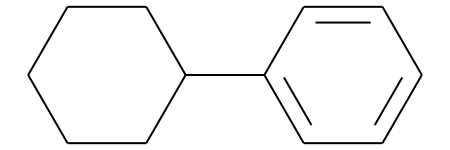

Compounds:


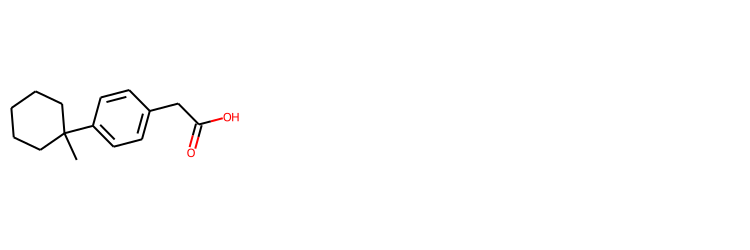

Scaffold: c1cc2cc(c1)O2.c1ccccc1


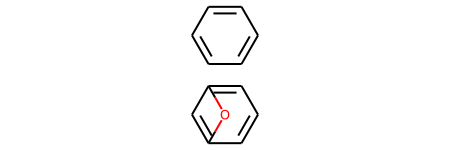

Compounds:


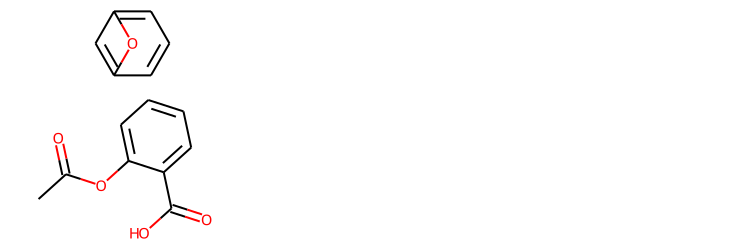

Scaffold: C(/C=C/c1ccccc1)=C\c1ccccc1


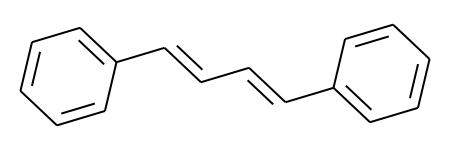

Compounds:


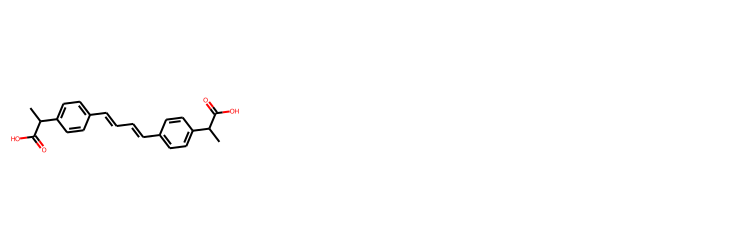

Scaffold: c1ccc(CCc2ccccc2)cc1


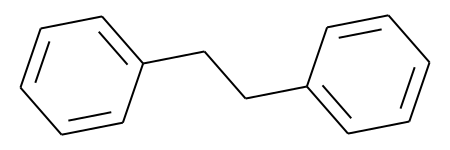

Compounds:


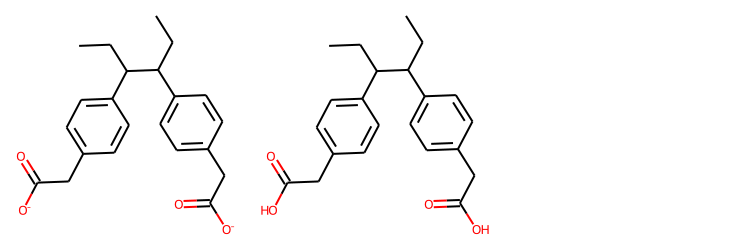

Scaffold: c1ccccc1


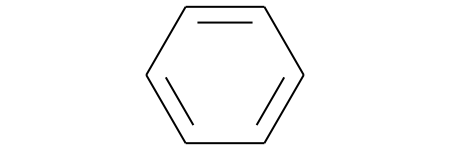

Compounds:


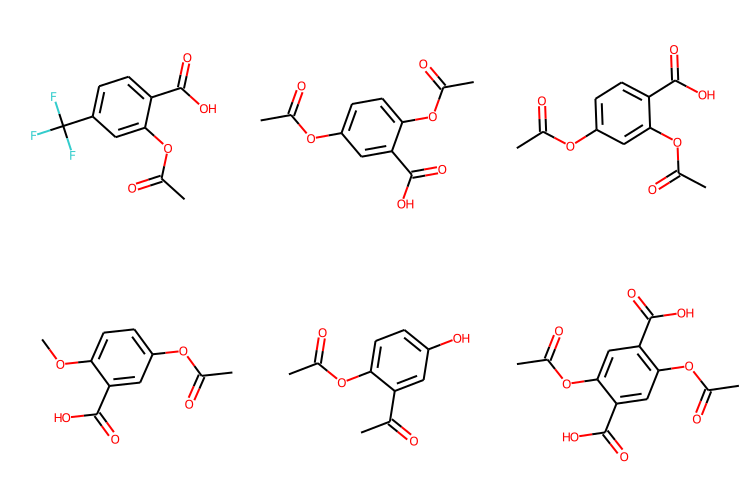

Scaffold: O=C1CCCC(c2ccccc2)C1


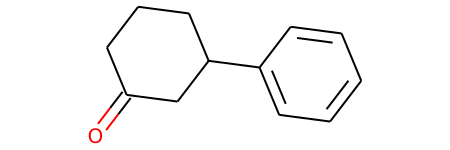

Compounds:


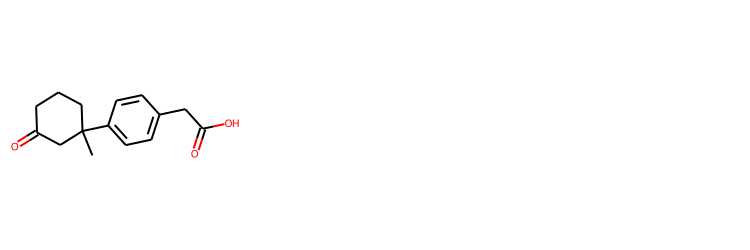

Scaffold: C1=CCC(Cc2ccccc2)=CC1


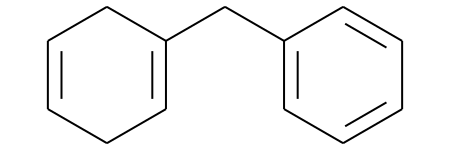

Compounds:


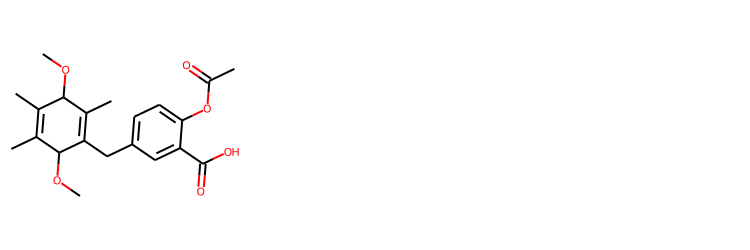

Scaffold: c1ccc(-c2ccccc2)cc1


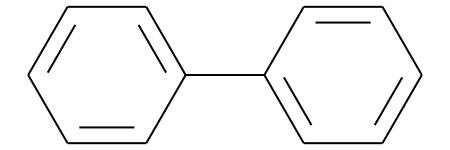

Compounds:


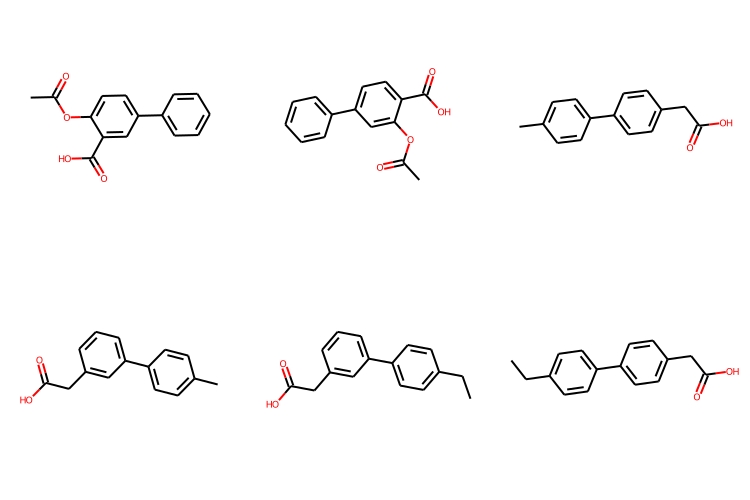

Scaffold: c1ccc(Cc2ccccc2)cc1


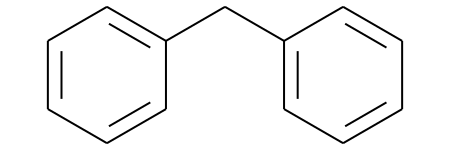

Compounds:


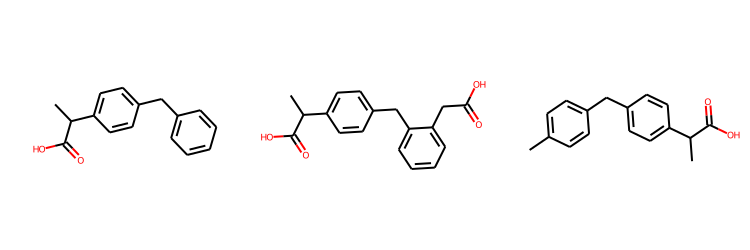

Scaffold: O=C1C=CC(=O)C(Cc2ccccc2)=C1


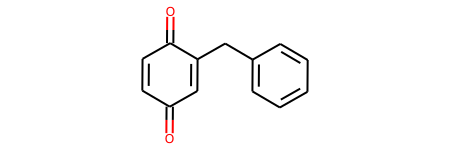

Compounds:


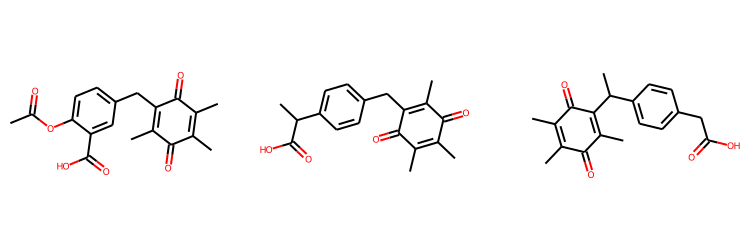

Scaffold: O=C(Oc1ccccc1)c1ccccc1


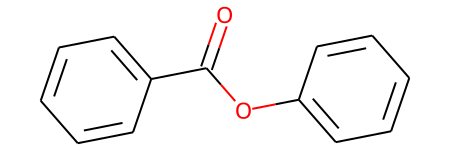

Compounds:


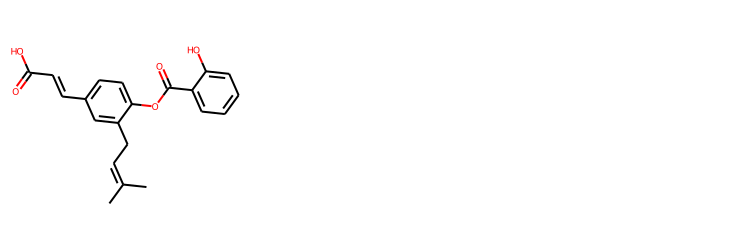

Scaffold: O=C(CC1CC=CC1)Oc1ccccc1


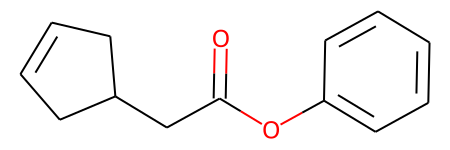

Compounds:


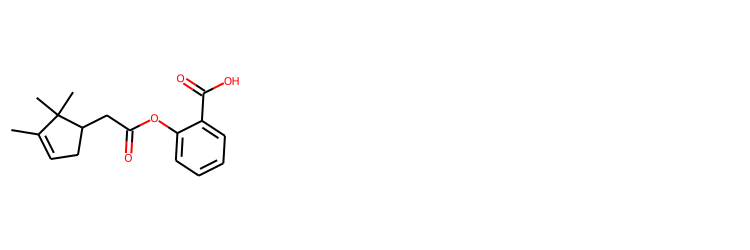

Scaffold: c1ccccc1


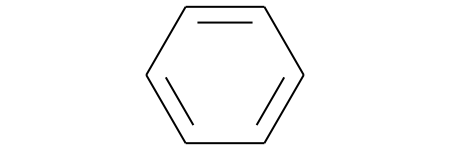

Compounds:


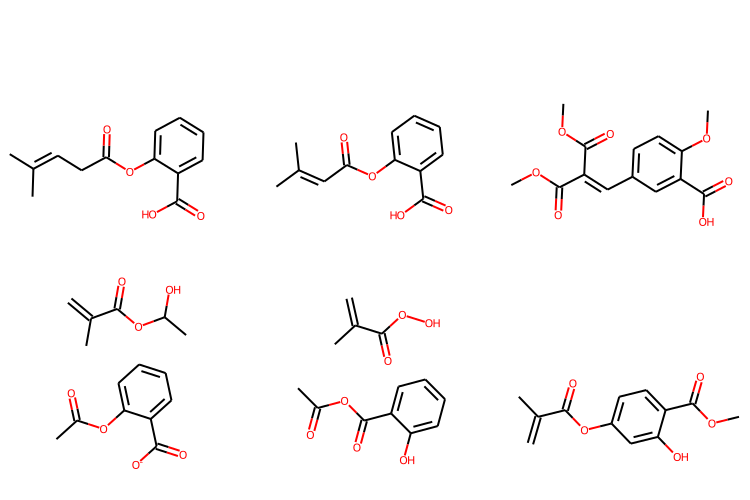

Scaffold: C1=CCC(Cc2ccccc2)=CC1


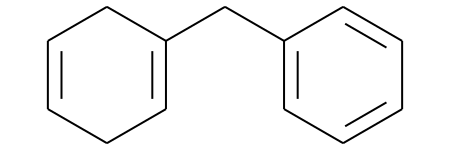

Compounds:


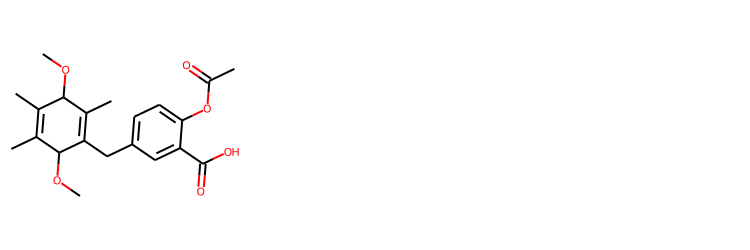

Scaffold: O=C1C=CC(=O)C(Cc2ccccc2)=C1


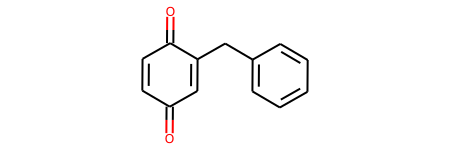

Compounds:


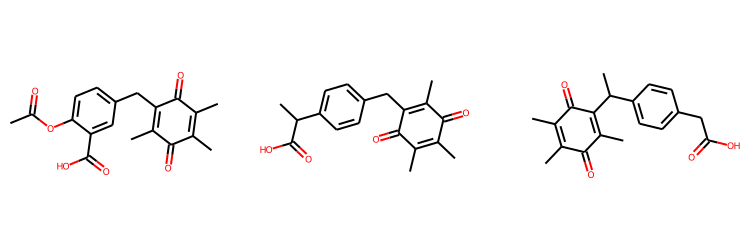

Scaffold: c1ccccc1


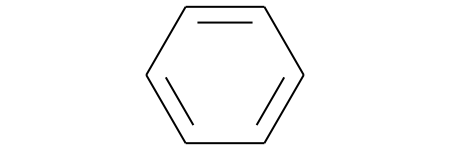

Compounds:


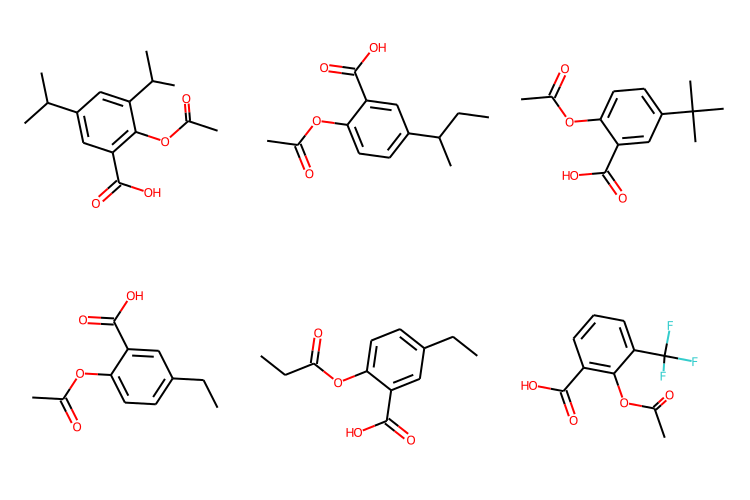

Scaffold: O=C1CCCC(c2ccccc2)C1


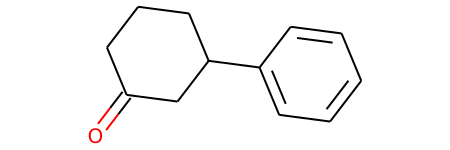

Compounds:


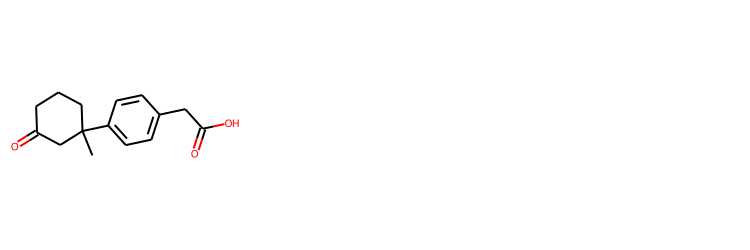

Scaffold: C1=CCC(Cc2ccccc2)=CC1


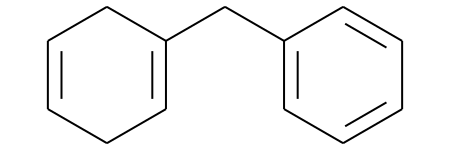

Compounds:


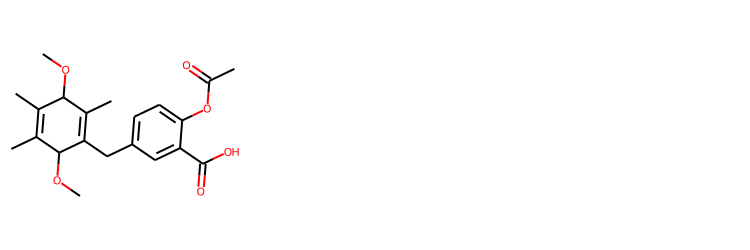

Scaffold: c1ccccc1.c1ccccc1


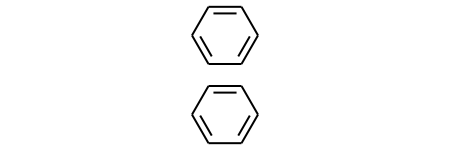

Compounds:


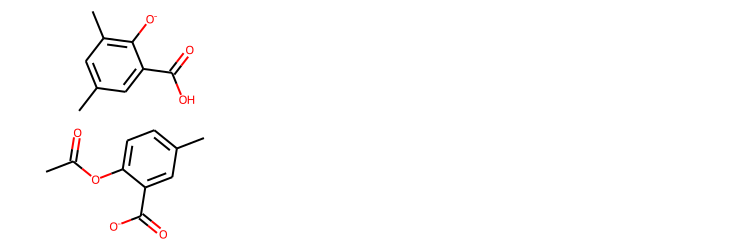

In [39]:
for cltsnedf in closetsnedfs:
    for scaff in list(set(cltsnedf['Scaffold'].tolist())):
        if str(scaff) != 'nan':
            print('Scaffold:', scaff)
            display(Chem.MolFromSmiles(scaff))
            print('Compounds:')
            display(Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in cltsnedf[cltsnedf['Scaffold'] == scaff]['SMILES'].tolist()], 
                                         subImgSize=(250,250), 
                                         maxMols=6))

In [40]:
smilist = []

for clpcadf in closepcadfs:
    smilist.extend(clpcadf[clpcadf['Group'] == 'Group 2']['SMILES'].tolist())
for cltsnedf in closetsnedfs:
    smilist.extend(cltsnedf[cltsnedf['Group'] == 'Group 2']['SMILES'].tolist())

smilist = list(set(smilist))
len(smilist)

138

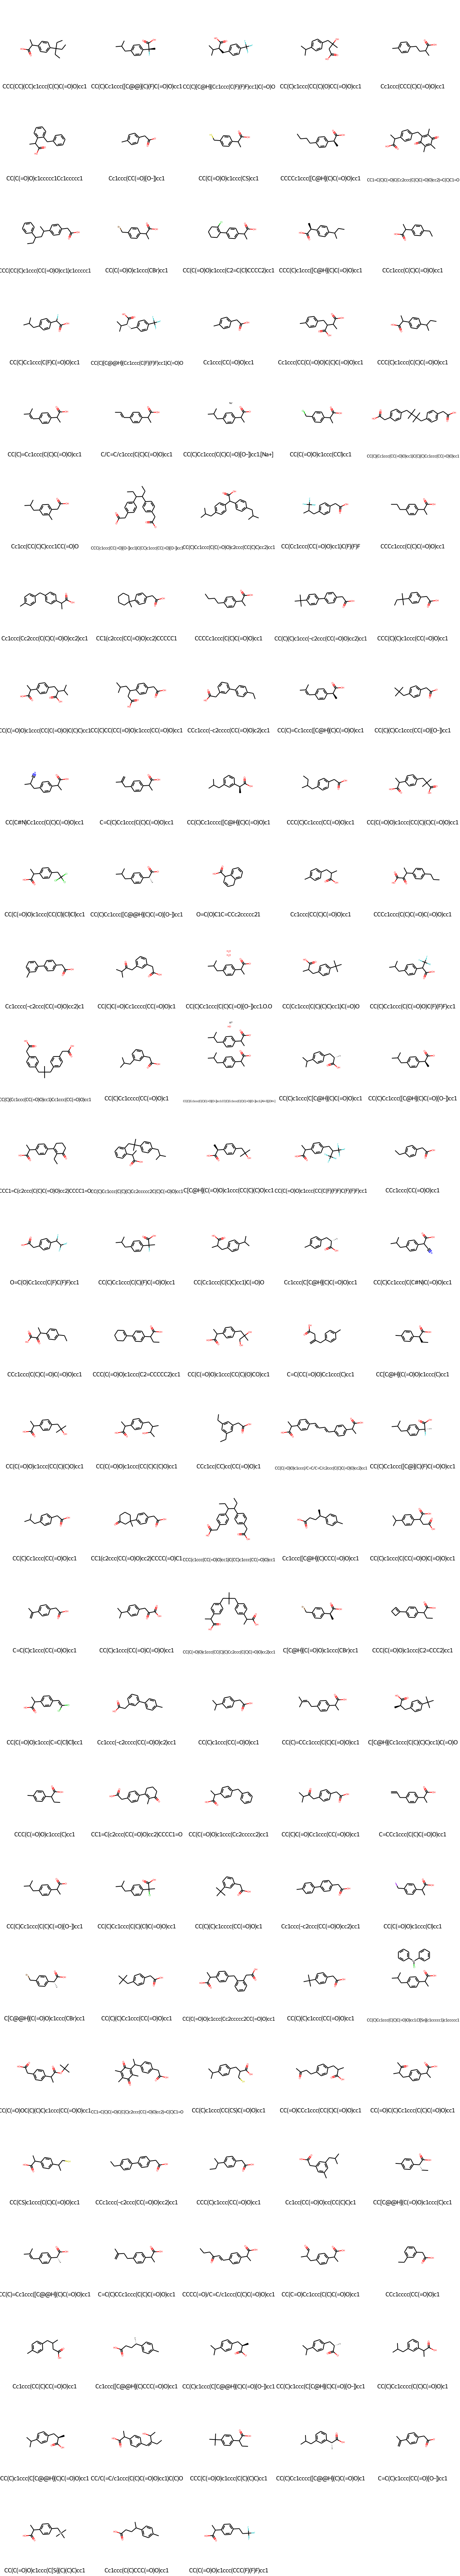

In [41]:
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in smilist], 
                     subImgSize=(250,250), 
                     molsPerRow=5, 
                     legends=smilist, 
                     maxMols=1000)